In [214]:
import os
import pandas as pd
import numpy as np


def npz_to_dataframe(directory, img_directory=None):
    # Lists to store data
    records = []

    # Walk through all files in the directory
    for dirpath, dirnames, filenames in os.walk(directory):
        for filename in filenames:
            # Check if the file is an .npz file
            if (filename.endswith('.npz') and 'out_dist' not in filename
                    and 'out_dist' not in os.path.basename(dirpath)):
                filepath = os.path.join(dirpath, filename)

                # Load npz file
                with np.load(filepath) as data:
                    arrays = []
                    for key in data.keys():
                        if 'artifact' in key:
                            arrays.append(5 - data[key])
                        else:
                            arrays.append(data[key])
                    if arrays:
                        stacked = np.vstack(arrays).T

                        if img_directory is not None:
                            # Get corresponding images for the npz
                            corresponding_img_dir = os.path.join(
                                img_directory,
                                os.path.relpath(dirpath, directory))
                            all_images = [
                                img
                                for img in os.listdir(corresponding_img_dir)
                                if img.endswith(('.jpg', '.jpeg', '.png',
                                                 '.webp'))
                            ]
                            sorted_images = sorted(
                                all_images, key=lambda x: os.path.basename(x))

                            if len(stacked) != len(sorted_images):
                                raise ValueError(
                                    f"Number of images in {corresponding_img_dir} doesn't match stacked array length for {filepath}"
                                )

                        for i in range(stacked.shape[0]):
                            record = {
                                'folder_path':
                                os.path.relpath(filepath, directory)
                            }
                            if img_directory is not None:
                                record['image_path'] = sorted_images[i]
                            for j, key in enumerate(data.keys()):
                                record[key] = stacked[i, j]
                            records.append(record)

    # Construct a DataFrame
    df = pd.DataFrame(records)
    df['category'] = df['folder_path'].apply(lambda x: x.split(os.path.sep)[0])

    return df

### Dataset

In [200]:
df = npz_to_dataframe(
    'ref_scores/',
    '/media/sashi/DATA1/datasets_downloaded/lycoris_exp_paper/dataset/evaluation'
)
df['class'] = df['folder_path'].apply(lambda x: '-'.join(x.split(os.path.sep)[:-1]))

In [201]:
df

,folder_path,image_path,liqe-resize,maniqa-resize,artifact-resize,artifact-padding,category,class
0,anime/abukuma/none/image-scores.npz,1741730-0000.png,2.958466,0.497843,1.457031,1.062500,anime,anime-abukuma-none
1,anime/abukuma/none/image-scores.npz,1880435-0000.png,2.875680,0.341723,1.443359,1.132812,anime,anime-abukuma-none
2,anime/abukuma/none/image-scores.npz,1880758-0000.png,2.912888,0.504805,1.205078,0.859375,anime,anime-abukuma-none
3,anime/abukuma/none/image-scores.npz,2043610-0000.png,2.955125,0.458454,2.228516,1.804688,anime,anime-abukuma-none
4,anime/abukuma/none/image-scores.npz,2047729-0000.png,2.731260,0.495296,1.505859,1.505859,anime,anime-abukuma-none
...,...,...,...,...,...,...,...,...
1691,style/vladimir_borovikovsky/image-scores.npz,vladimir-borovikovsky_portrait-of-yuri-f-lisya...,2.831093,0.404744,2.884766,2.931641,style,style-vladimir_borovikovsky
1692,style/vladimir_borovikovsky/image-scores.npz,vladimir-borovikovsky_praskovia-bestuzhev-1806...,2.503381,0.355021,2.742188,2.794922,style,style-vladimir_borovikovsky
1693,style/vladimir_borovikovsky/image-scores.npz,vladimir-borovikovsky_princess-lopukhina.jpg,3.009613,0.446150,2.603516,2.667969,style,style-vladimir_borovikovsky
1694,style/vladimir_borovikovsky/image-scores.npz,vladimir-borovikovsky_rodzianko-ekaterina.jpg,3.043759,0.468877,2.443359,2.390625,style,style-vladimir_borovikovsky


In [100]:
df.sort_values(by='liqe-resize')[:50][['image_path']]

,image_path
601,image_20211118_162049.jpg
1332,alfred-sisley_snow-at-marly-le-roi-1876.jpg
1380,walter-sickert_off-to-the-pub.jpg
666,image_20211118_162141_1724.jpg
1409,william-merritt-chase_the-japanese-book-1900.jpg
1006,felix-vallotton_portrait-of-french-writer-vict...
988,felix-vallotton_portrait-of-french-writer-henr...
1000,felix-vallotton_portrait-of-french-writer-paul...
1488,image_258.jpg
1002,felix-vallotton_portrait-of-french-writer-ren-...


In [101]:
df.sort_values(by='artifact-padding')[-50:][['image_path']]

,image_path
1486,image_256.jpg
797,image_20211118_161933.jpg
864,ravi-pinisetti-sxWyOaHJb0s-unsplash.jpg
963,felix-vallotton_portrait-of-french-poet-jehan-...
974,felix-vallotton_portrait-of-french-writer-and-...
865,tim-mossholder-o3qMftQupG8-unsplash.jpg
1002,felix-vallotton_portrait-of-french-writer-ren-...
1348,robert-julian-onderdonk_landscape-4.jpg
1646,vladimir-borovikovsky_portrait-of-aleksei-alek...
1364,rudolf-schweitzer-cumpana_peisaj-de-iarn.jpg


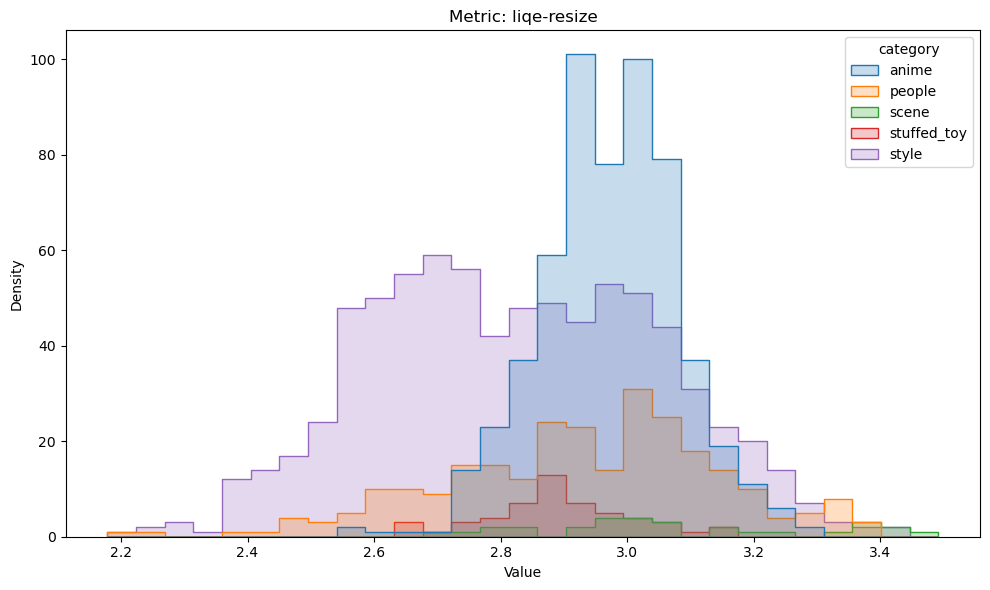

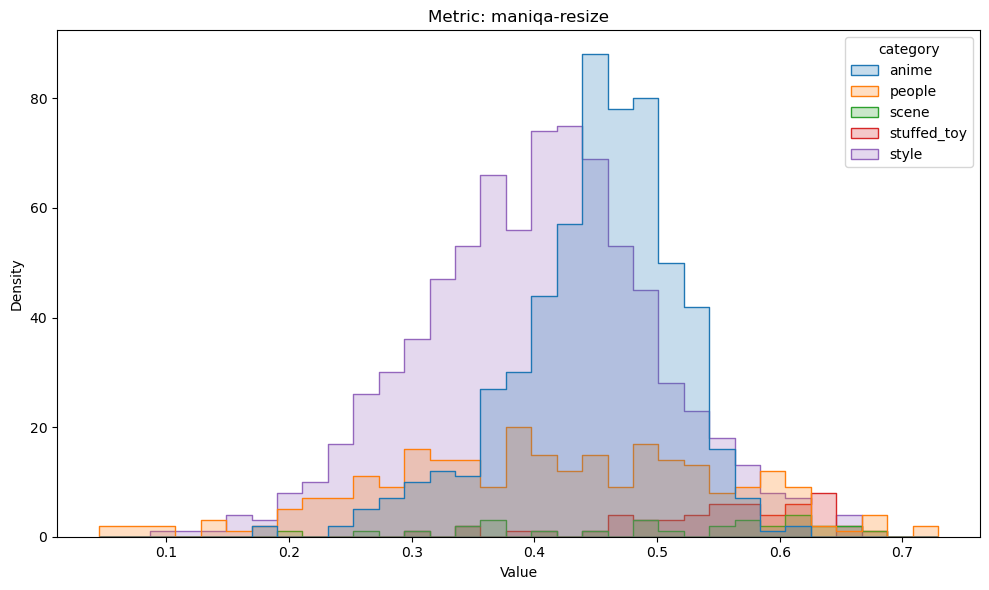

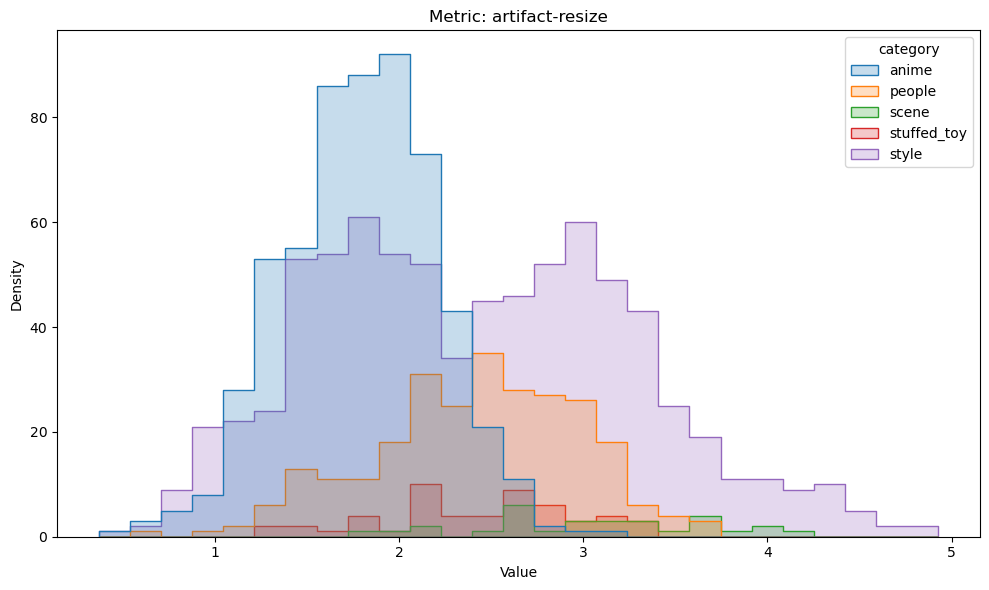

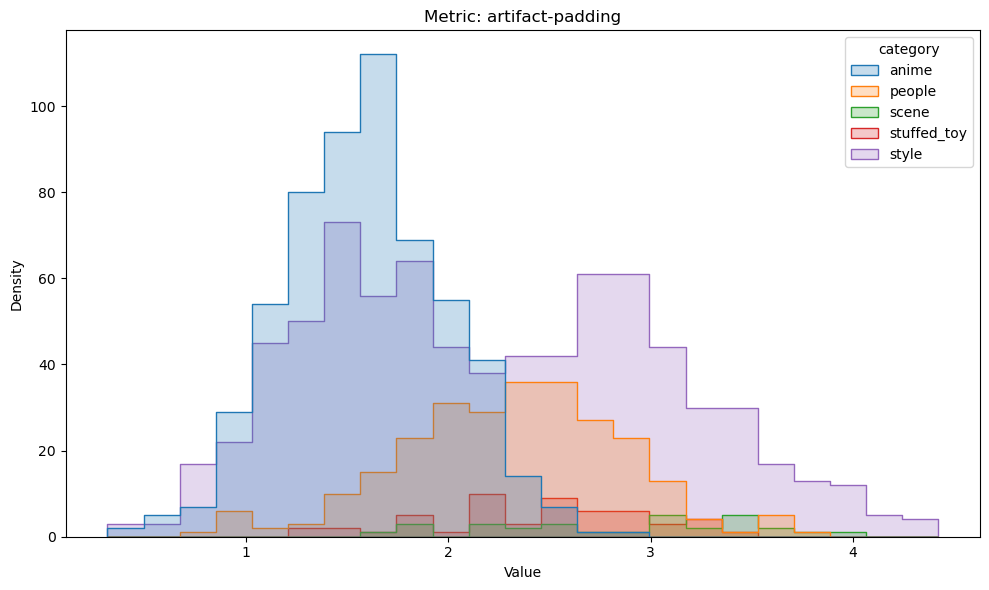

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

df['dummy_index'] = range(len(df))
metrics = df.columns[2:6]

for metric in metrics:

    metric_df = df.pivot(index='dummy_index',
                         columns='category',
                         values=metric)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=metric_df, element="step", common_norm=False)
    plt.title(f'Metric: {metric}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f'figures/real-{metric}.png')

In [103]:
correlation_matrix

,liqe-resize,maniqa-resize,artifact-resize,artifact-padding
liqe-resize,1.000000,0.437590,0.357139,0.348489
maniqa-resize,0.437590,1.000000,0.208896,0.206194
artifact-resize,0.357139,0.208896,1.000000,0.959150
artifact-padding,0.348489,0.206194,0.959150,1.000000


<AxesSubplot: >

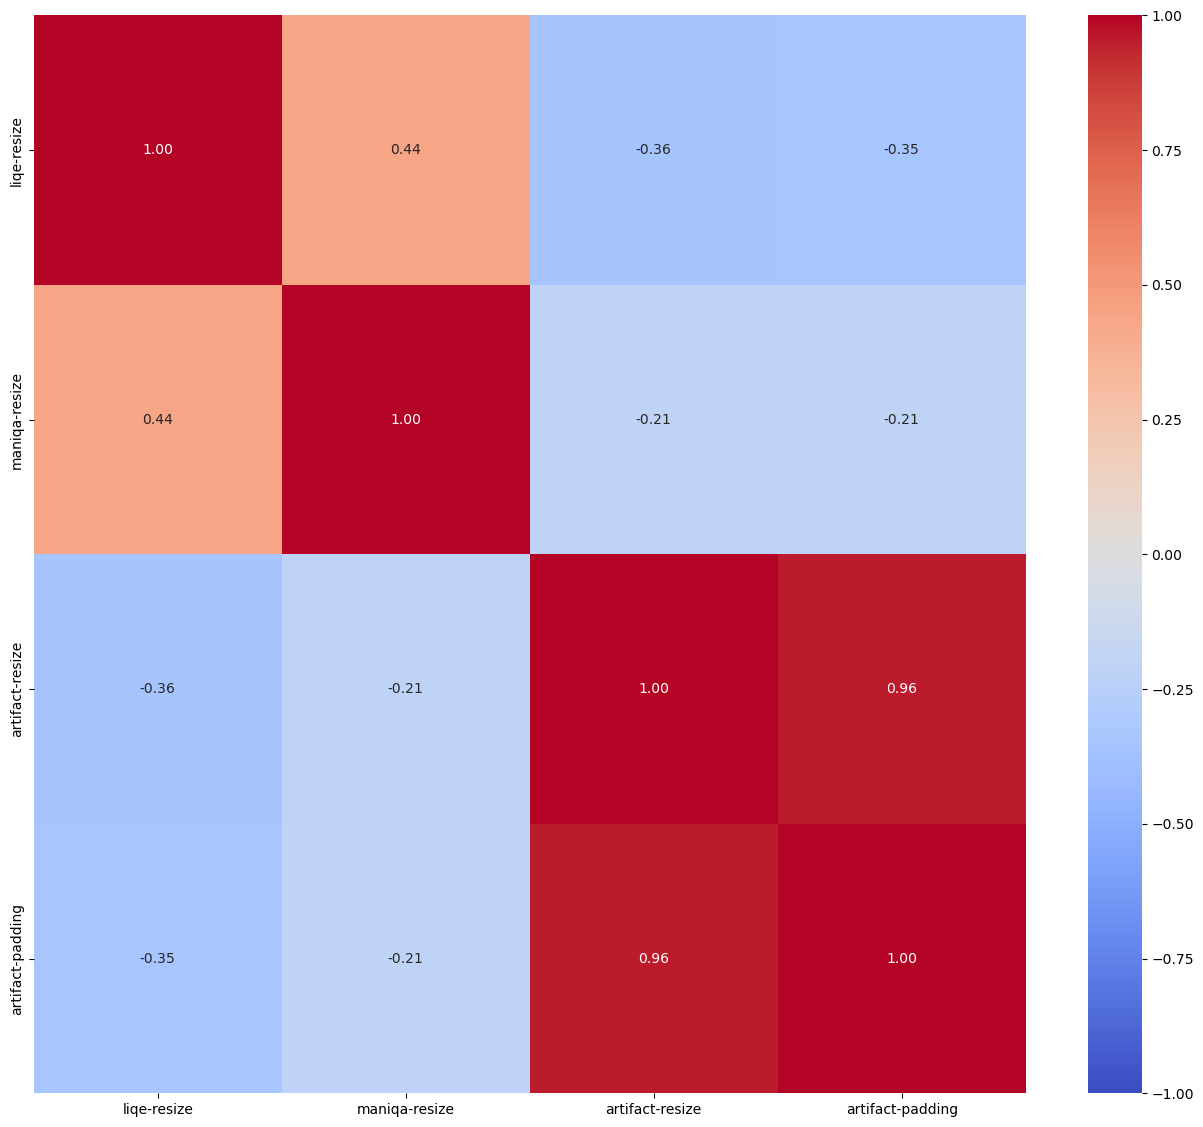

In [104]:
ordered_cols = [
    'liqe-resize',
    'maniqa-resize',
    'artifact-resize',
    'artifact-padding'
]
correlation_matrix = df[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")

<AxesSubplot: >

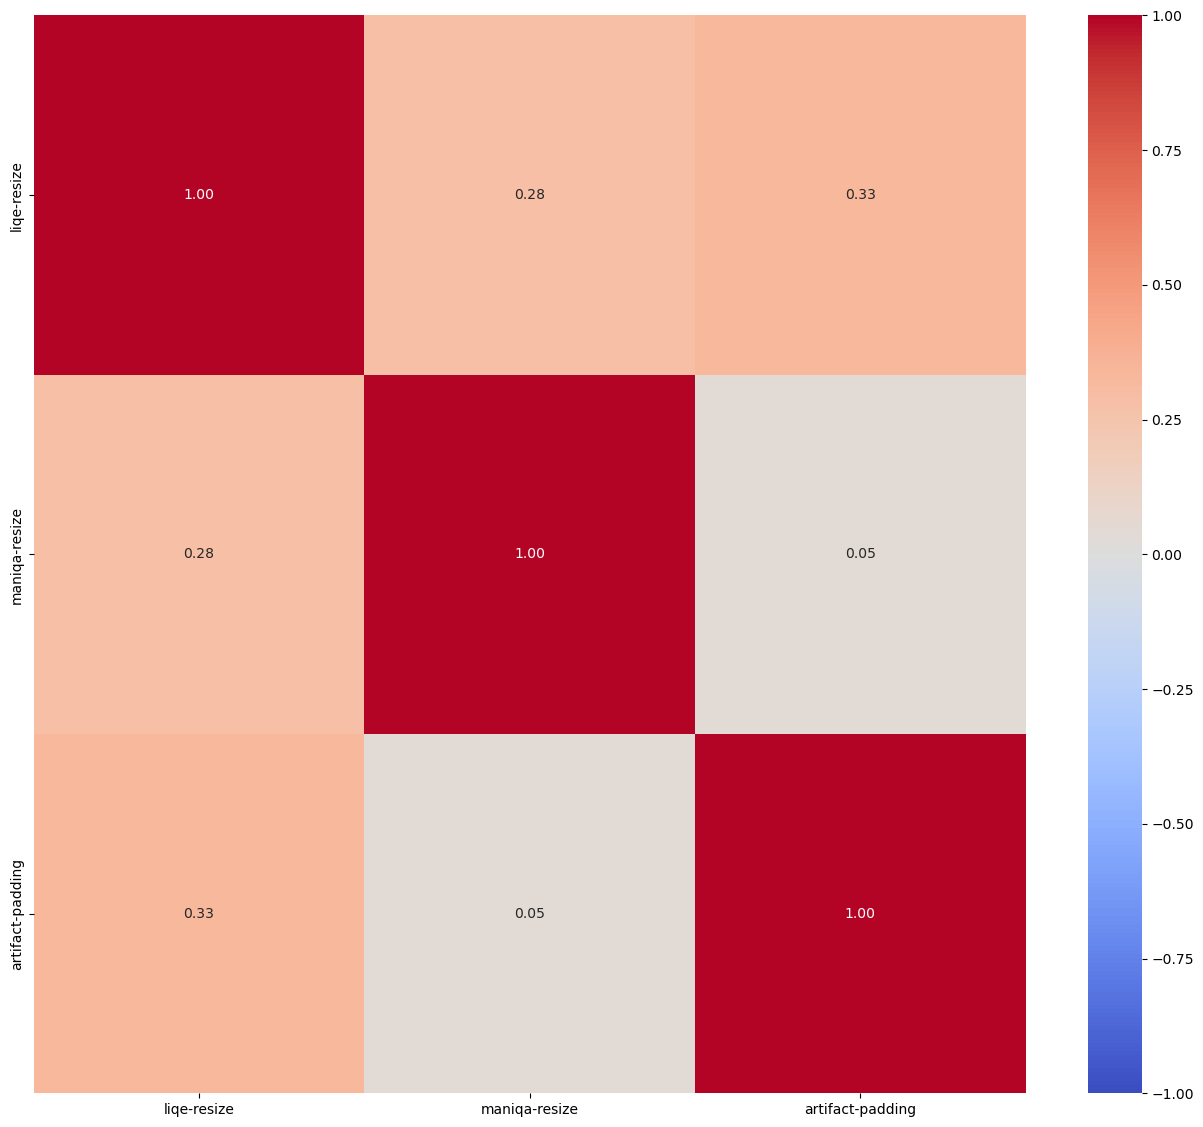

In [238]:
ordered_cols = ['liqe-resize', 'maniqa-resize', 'artifact-padding']
df_sel = df[df['category'].apply(
    lambda x: x not in ['anime', 'style'])]
correlation_matrix = df_sel[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")

### Generated images

In [215]:
df_gen = npz_to_dataframe(
    '/media/sashi/DATA1/datasets_downloaded/lycoris_exp_paper/generated_db_scores/exp-1101-sd15-nt-a-000030/',
    None
)
df_gen['class'] = df_gen['folder_path'].apply(lambda x: '-'.join(x.split(os.path.sep)[:-2]))

In [216]:
df_gen

,folder_path,liqe-resize,maniqa-resize,artifact-padding,category,class
0,anime/abukuma/none/in_dist_prompts/image-score...,2.824946,0.413573,1.679688,anime,anime-abukuma-none
1,anime/abukuma/none/in_dist_prompts/image-score...,2.764098,0.292298,1.666016,anime,anime-abukuma-none
2,anime/abukuma/none/in_dist_prompts/image-score...,2.797775,0.377174,0.992188,anime,anime-abukuma-none
3,anime/abukuma/none/in_dist_prompts/image-score...,2.984611,0.373913,0.914062,anime,anime-abukuma-none
4,anime/abukuma/none/in_dist_prompts/image-score...,3.074084,0.432064,1.591797,anime,anime-abukuma-none
...,...,...,...,...,...,...
3895,style/vladimir_borovikovsky/in_dist_prompts/im...,2.618454,0.515276,2.056641,style,style-vladimir_borovikovsky
3896,style/vladimir_borovikovsky/in_dist_prompts/im...,2.891341,0.592035,2.072266,style,style-vladimir_borovikovsky
3897,style/vladimir_borovikovsky/in_dist_prompts/im...,2.869085,0.553632,2.392578,style,style-vladimir_borovikovsky
3898,style/vladimir_borovikovsky/in_dist_prompts/im...,2.991385,0.371506,2.093750,style,style-vladimir_borovikovsky


In [162]:
df_gen.columns[1:5]

Index(['liqe-resize', 'maniqa-resize', 'artifact-padding', 'category'], dtype='object')

In [217]:
df_gen

,folder_path,liqe-resize,maniqa-resize,artifact-padding,category,class
0,anime/abukuma/none/in_dist_prompts/image-score...,2.824946,0.413573,1.679688,anime,anime-abukuma-none
1,anime/abukuma/none/in_dist_prompts/image-score...,2.764098,0.292298,1.666016,anime,anime-abukuma-none
2,anime/abukuma/none/in_dist_prompts/image-score...,2.797775,0.377174,0.992188,anime,anime-abukuma-none
3,anime/abukuma/none/in_dist_prompts/image-score...,2.984611,0.373913,0.914062,anime,anime-abukuma-none
4,anime/abukuma/none/in_dist_prompts/image-score...,3.074084,0.432064,1.591797,anime,anime-abukuma-none
...,...,...,...,...,...,...
3895,style/vladimir_borovikovsky/in_dist_prompts/im...,2.618454,0.515276,2.056641,style,style-vladimir_borovikovsky
3896,style/vladimir_borovikovsky/in_dist_prompts/im...,2.891341,0.592035,2.072266,style,style-vladimir_borovikovsky
3897,style/vladimir_borovikovsky/in_dist_prompts/im...,2.869085,0.553632,2.392578,style,style-vladimir_borovikovsky
3898,style/vladimir_borovikovsky/in_dist_prompts/im...,2.991385,0.371506,2.093750,style,style-vladimir_borovikovsky


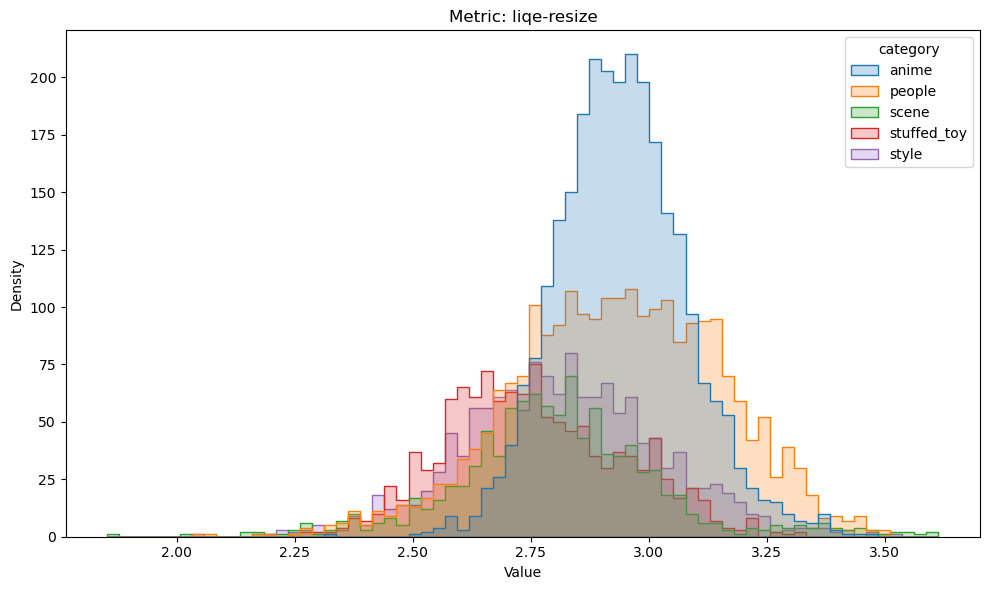

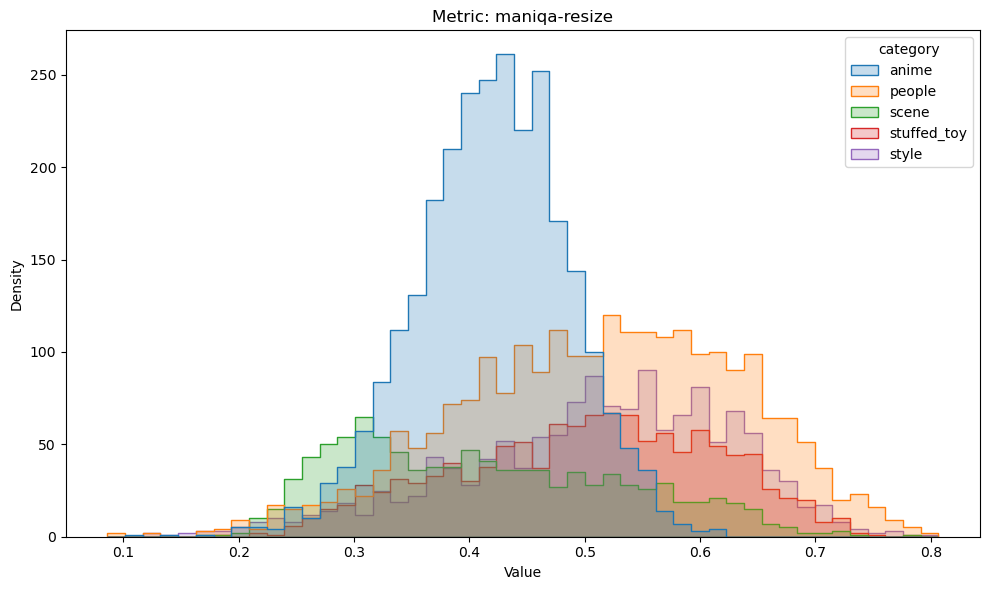

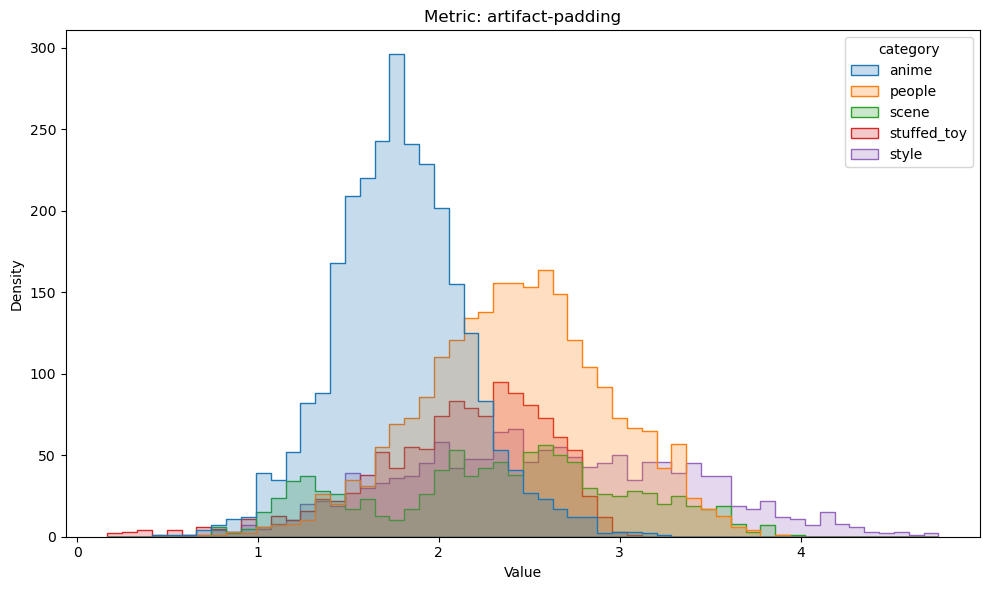

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

df_gen['dummy_index'] = range(len(df_gen))
metrics = df_gen.columns[1:4]

for metric in metrics:

    metric_df = df_gen.pivot(index='dummy_index',
                             columns='category',
                             values=metric)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=metric_df, element="step", common_norm=False)
    plt.title(f'Metric: {metric}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f'figures/generated-{metric}.png')

<AxesSubplot: >

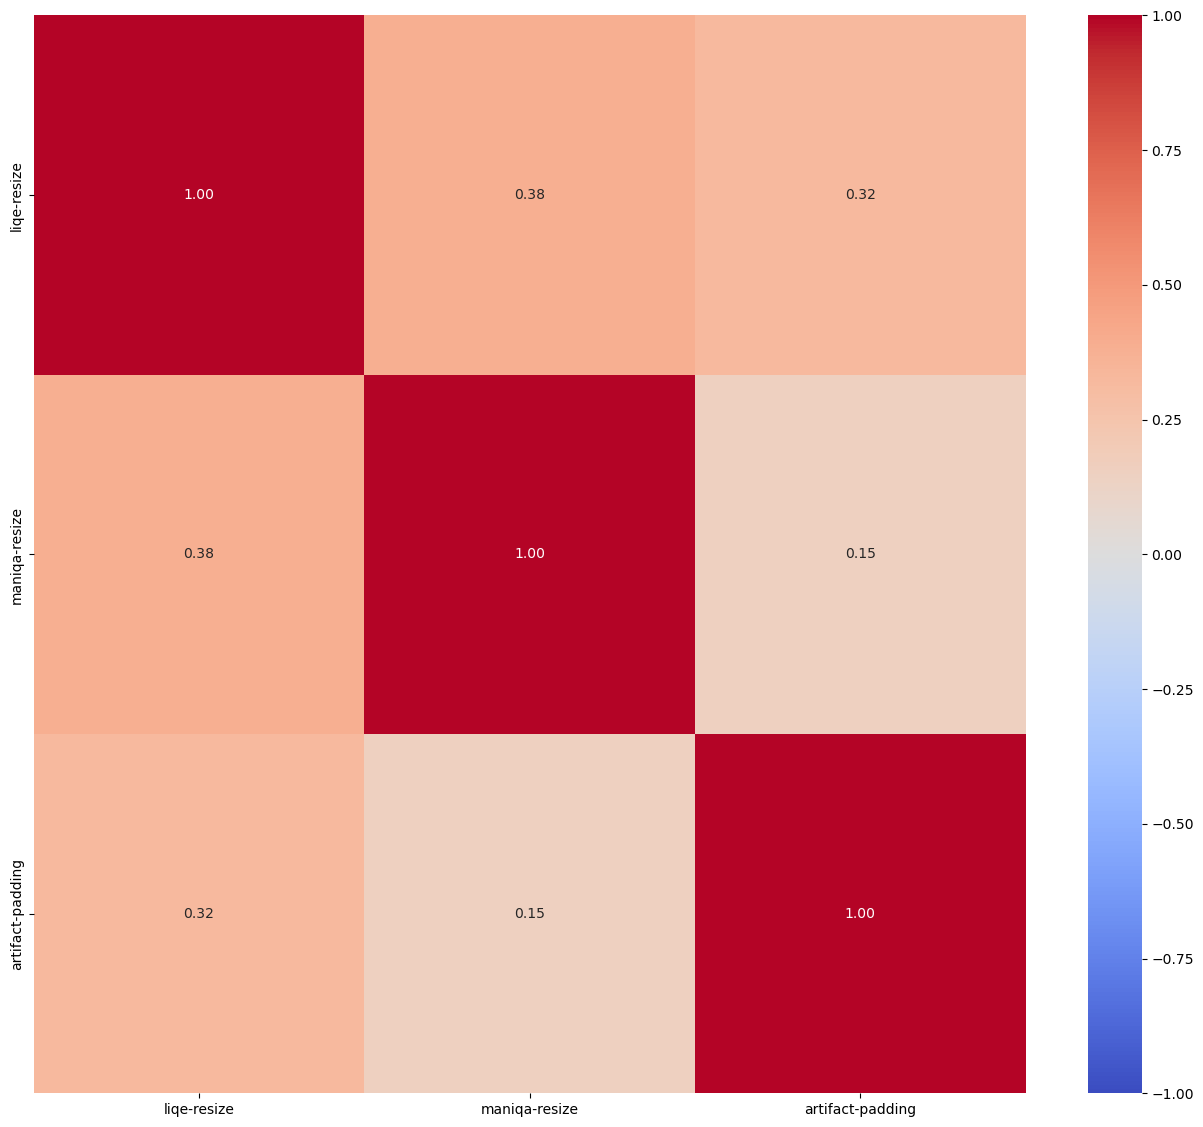

In [174]:
ordered_cols = ['liqe-resize', 'maniqa-resize', 'artifact-padding']
correlation_matrix = df_gen[ordered_cols].corr()
df_gen_sel = df_gen[df_gen['category'].apply(
    lambda x: x not in ['anime', 'style'])]
correlation_matrix = df_gen_sel[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")

In [147]:
def plot_mirrored_histogram(df1, df2, metric):
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))

    # Stack the dataframes with an indicator column
    df1['source'] = 'df1'
    df2['source'] = 'df2'
    combined = pd.concat([df1, df2])

    sns.histplot(data=combined[combined['source'] == 'df1'],
                 x=metric,
                 hue='category',
                 element="step",
                 ax=axes[0])
    sns.histplot(data=combined[combined['source'] == 'df2'],
                 x=metric,
                 hue='category',
                 element="step",
                 ax=axes[1])

    axes[1].invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title(f'Metric: {metric}, real on top, fake at bottom')
    plt.xlabel('Value')
    plt.tight_layout()

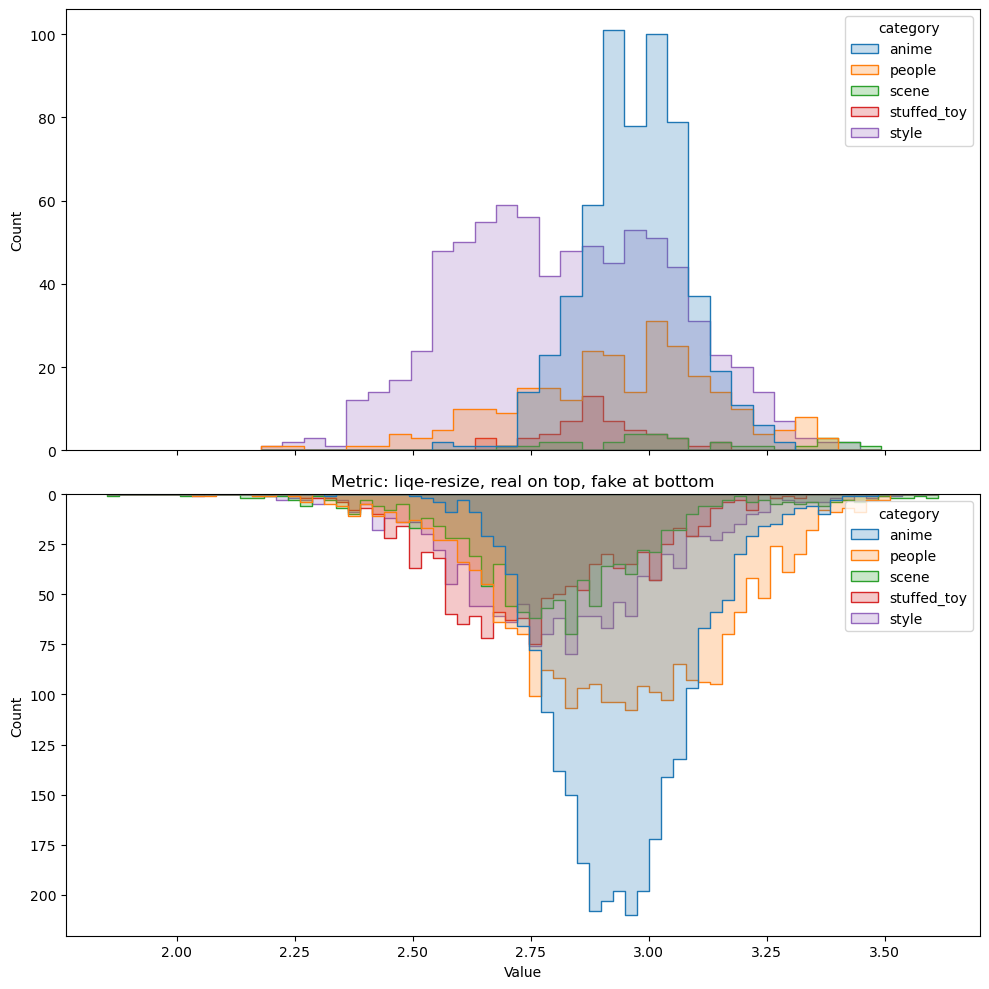

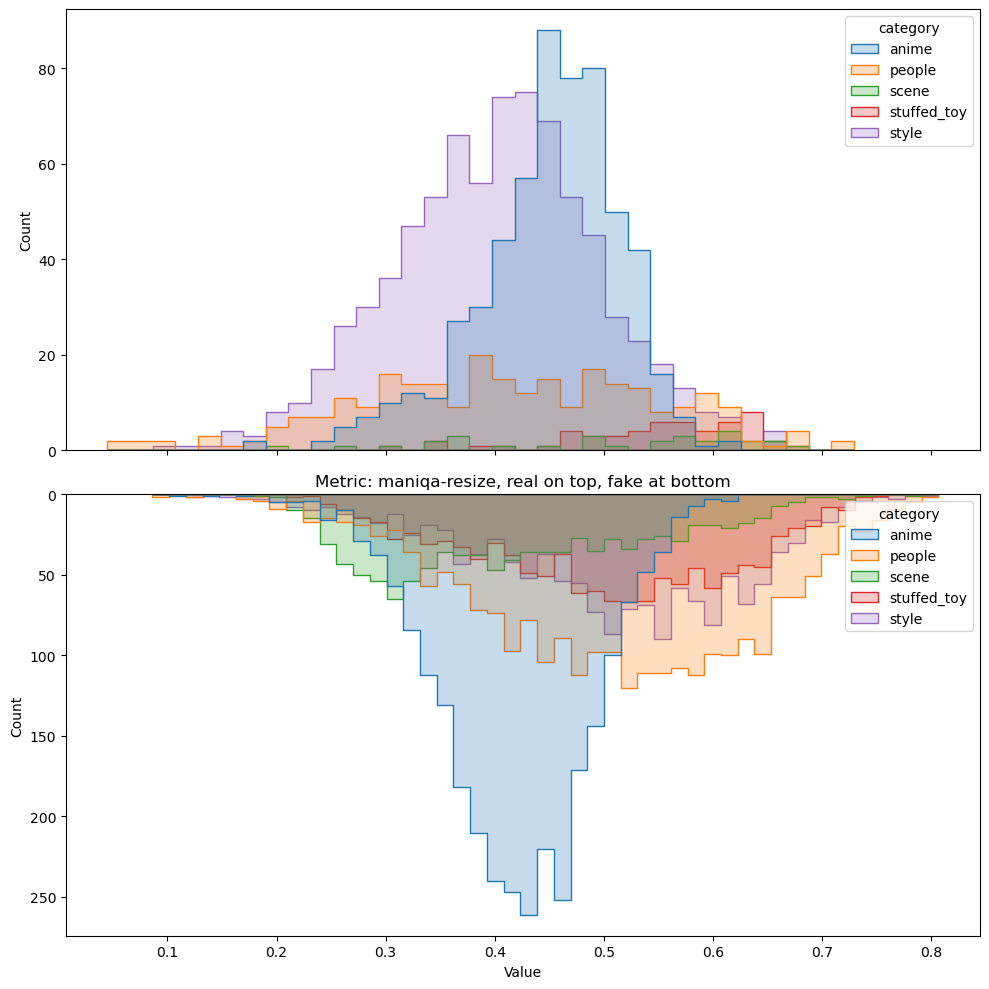

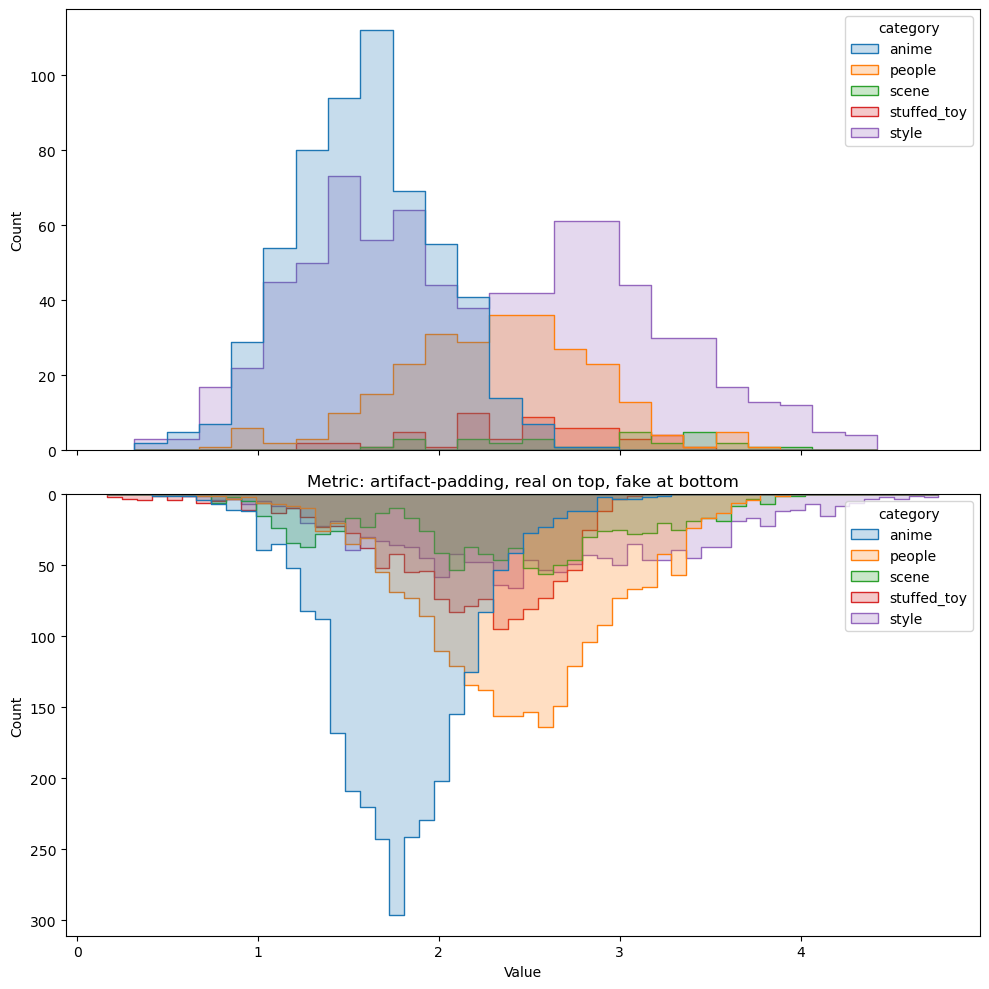

In [148]:
metrics = df_gen.columns[1:4]

for metric in metrics:
    plot_mirrored_histogram(df, df_gen, metric)
    plt.savefig(f'figures/{metric}.png')

In [114]:
df_gen.columns[1:4]

Index(['liqe-resize', 'maniqa-resize', 'artifact-padding'], dtype='object')

In [149]:
def plot_mirrored_histogram_category(df1, df2, metric, category):
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

    sns.histplot(data=df1[df1['category'] == category],
                 x=metric,
                 element="step",
                 ax=axes[0],
                 color='blue',
                 label='df1')
    sns.histplot(data=df2[df2['category'] == category],
                 x=metric,
                 element="step",
                 ax=axes[1],
                 color='orange',
                 label='df2')

    axes[1].invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title(f'Metric: {metric} for Category: {category}')
    plt.xlabel('Value')
    plt.tight_layout()

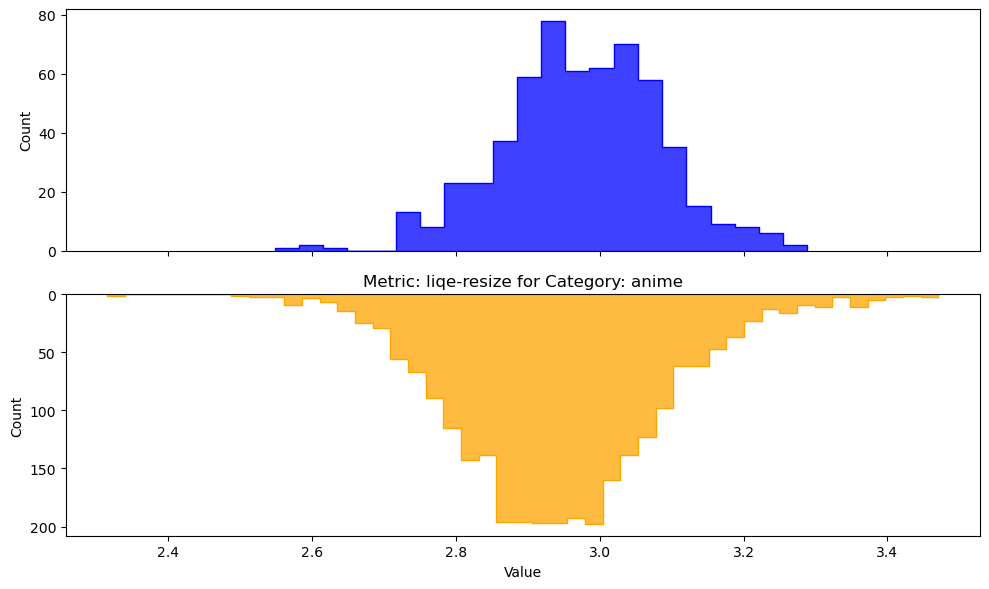

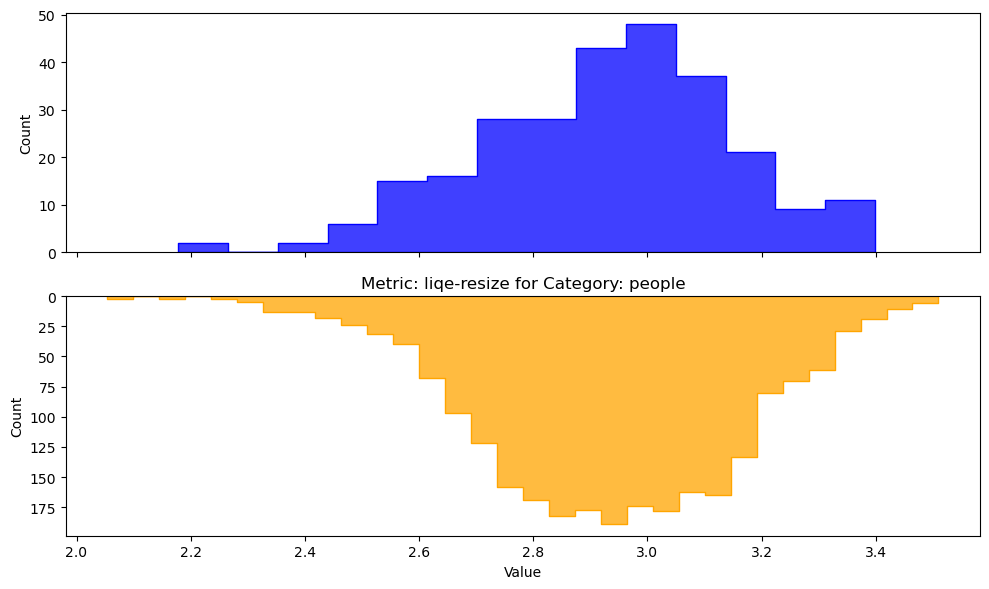

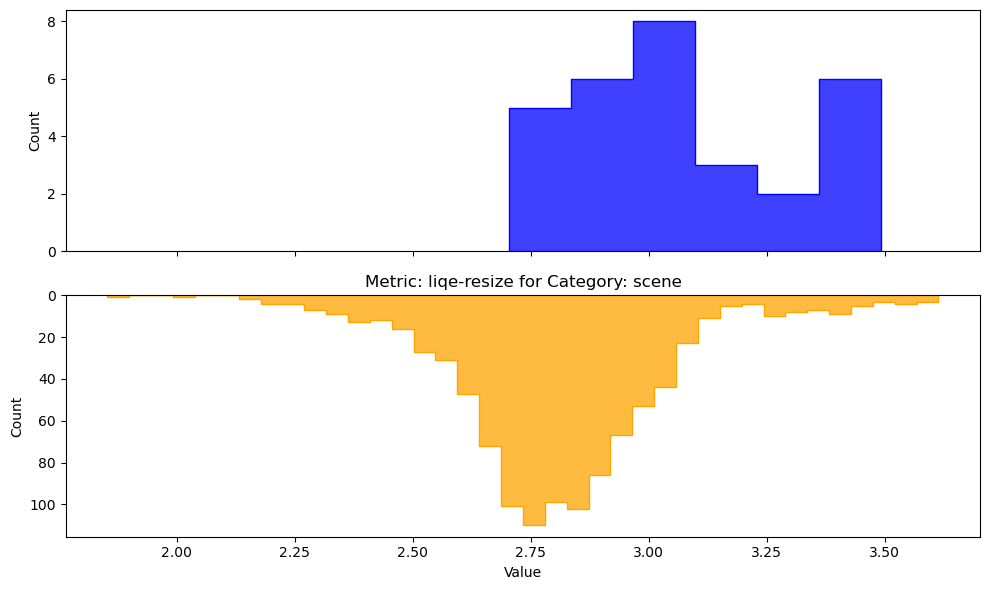

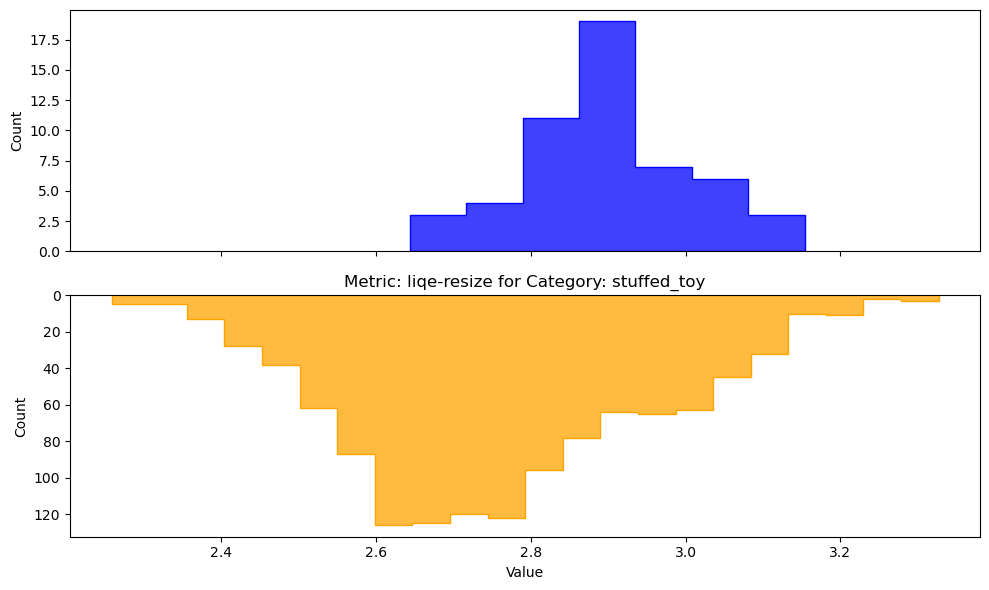

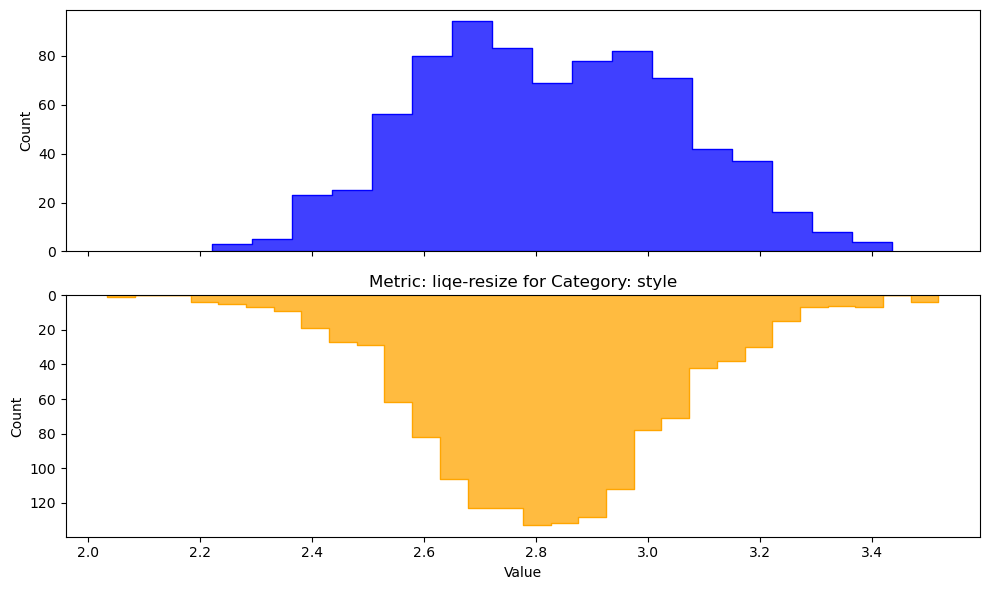

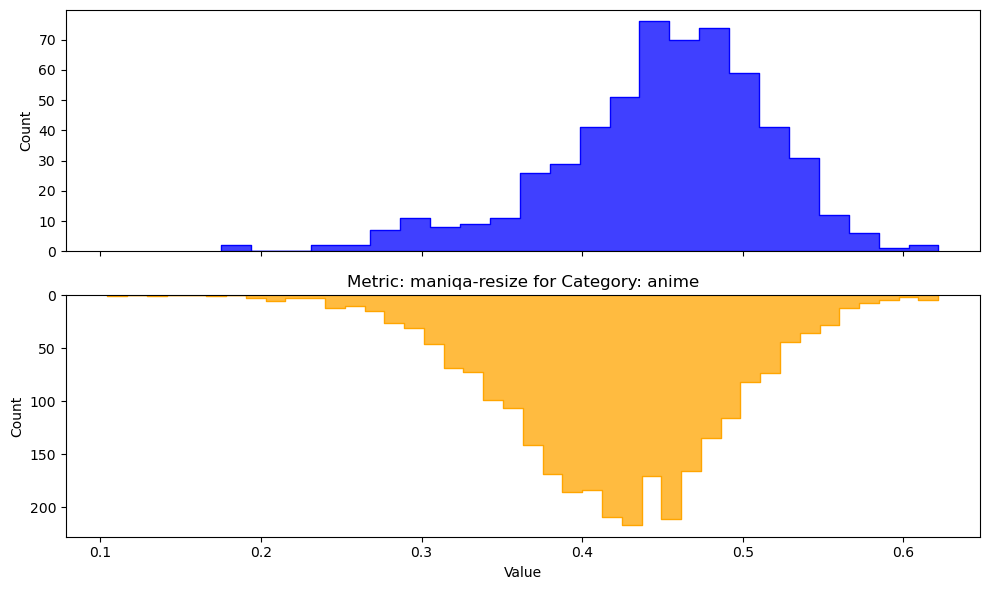

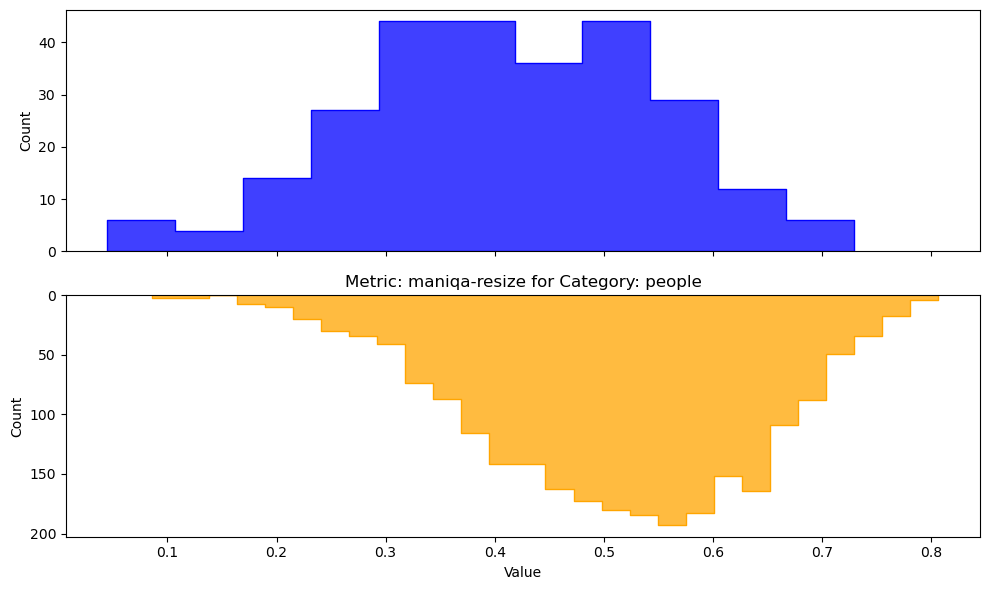

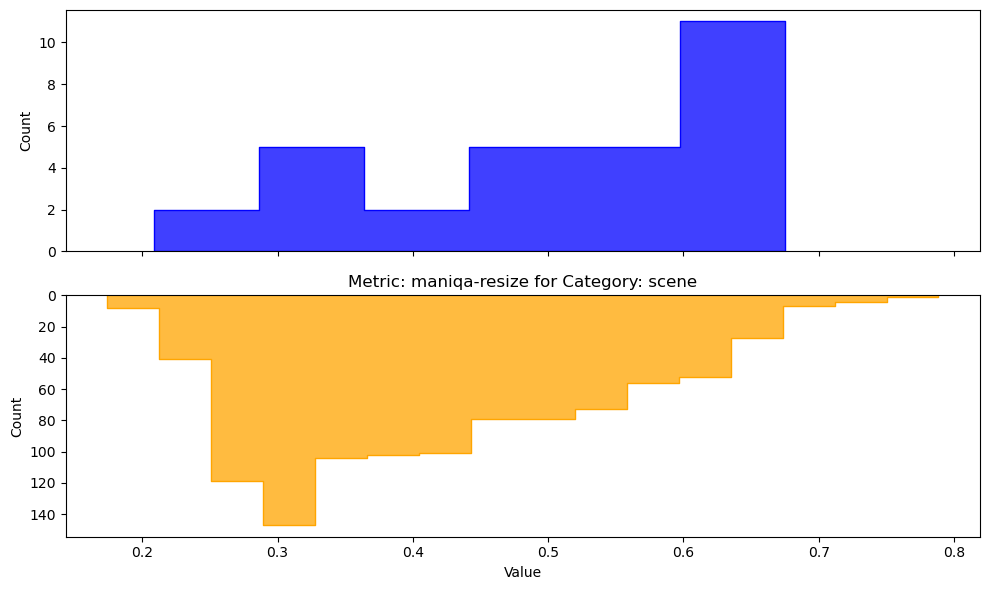

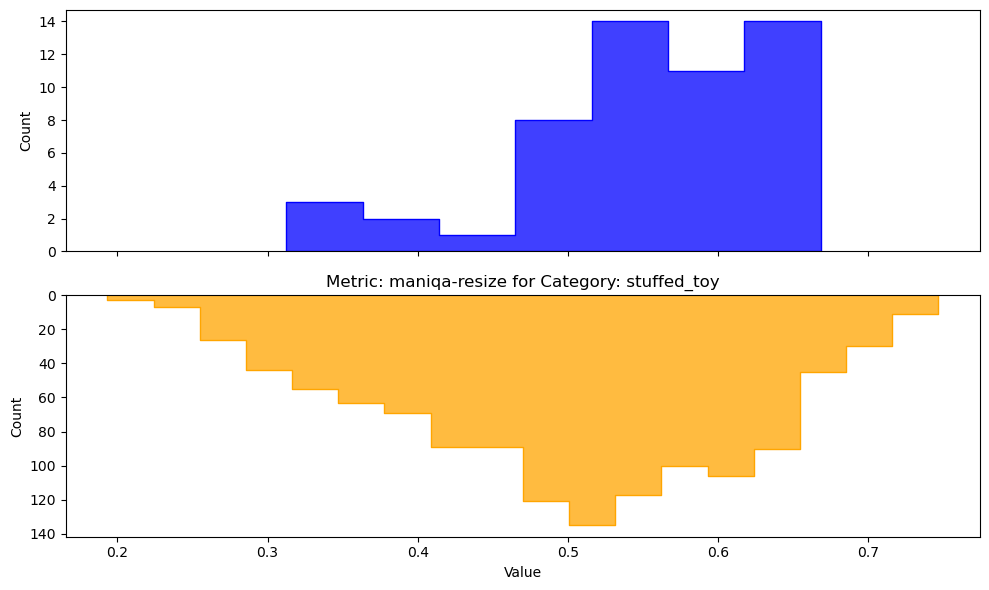

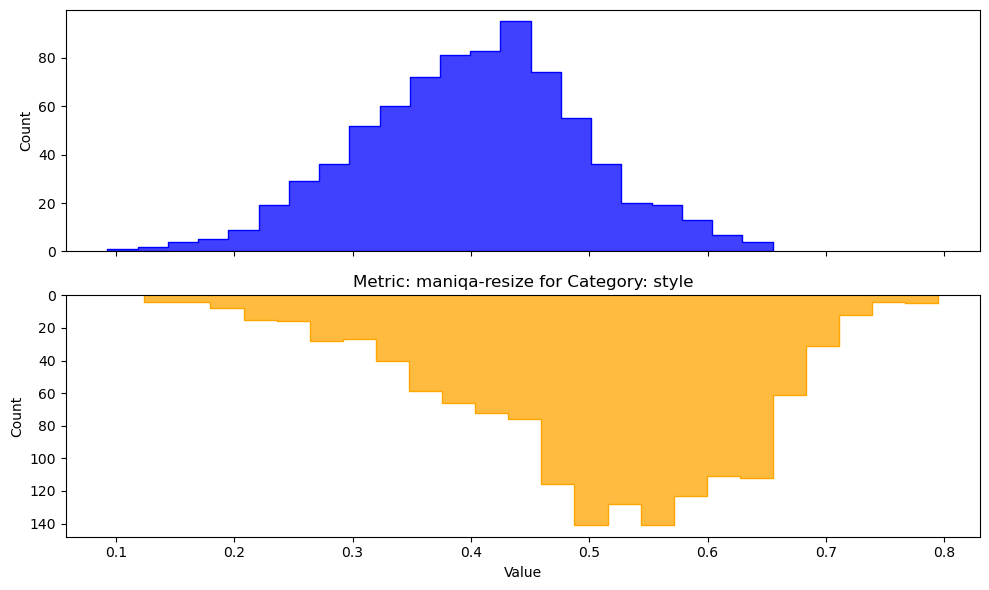

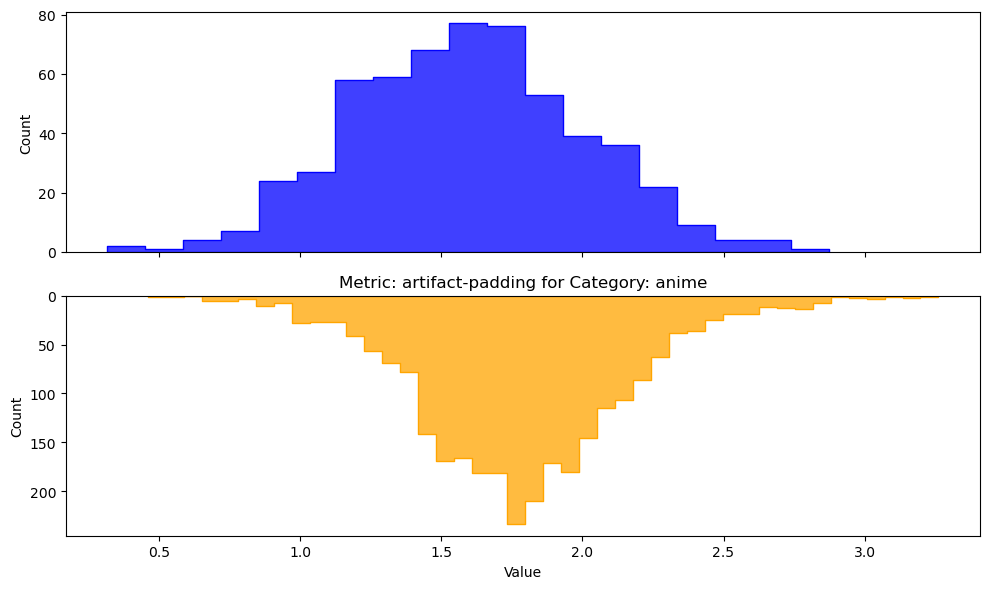

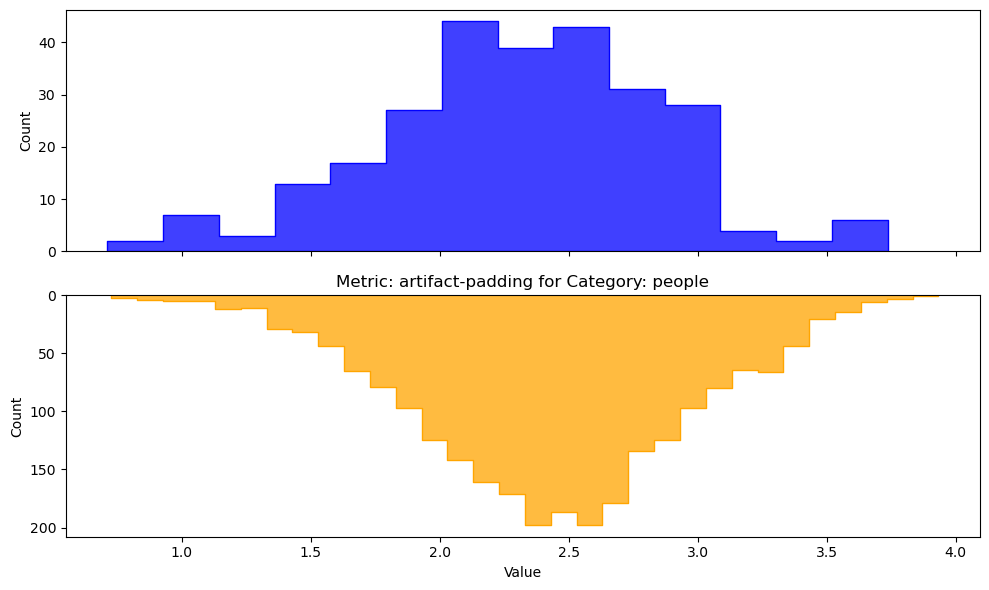

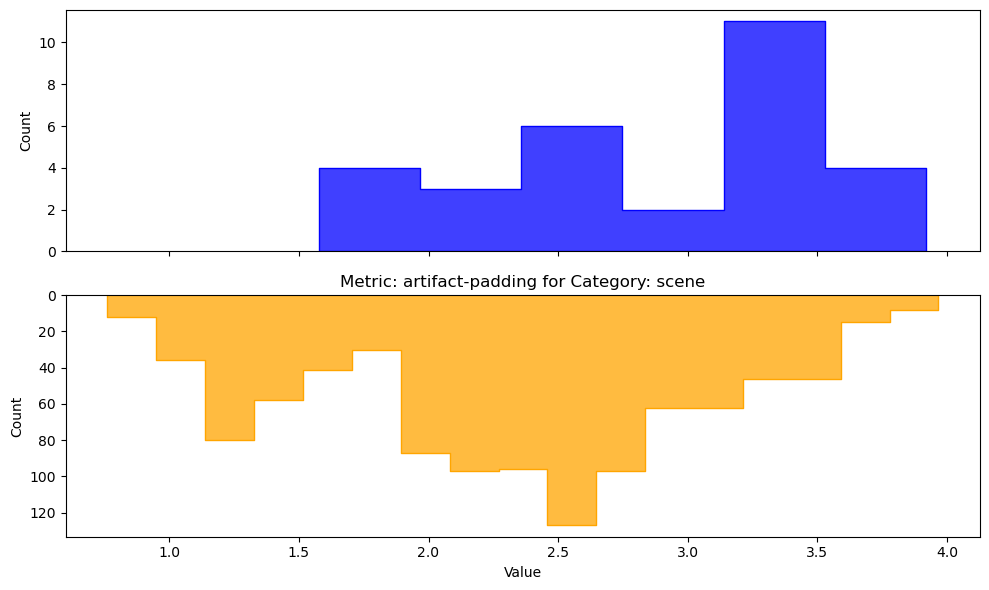

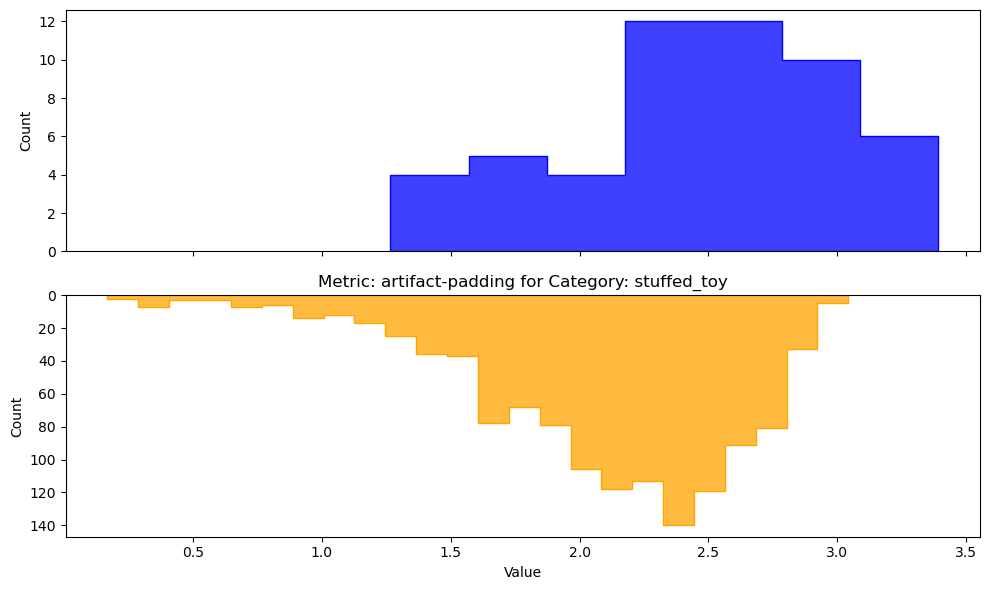

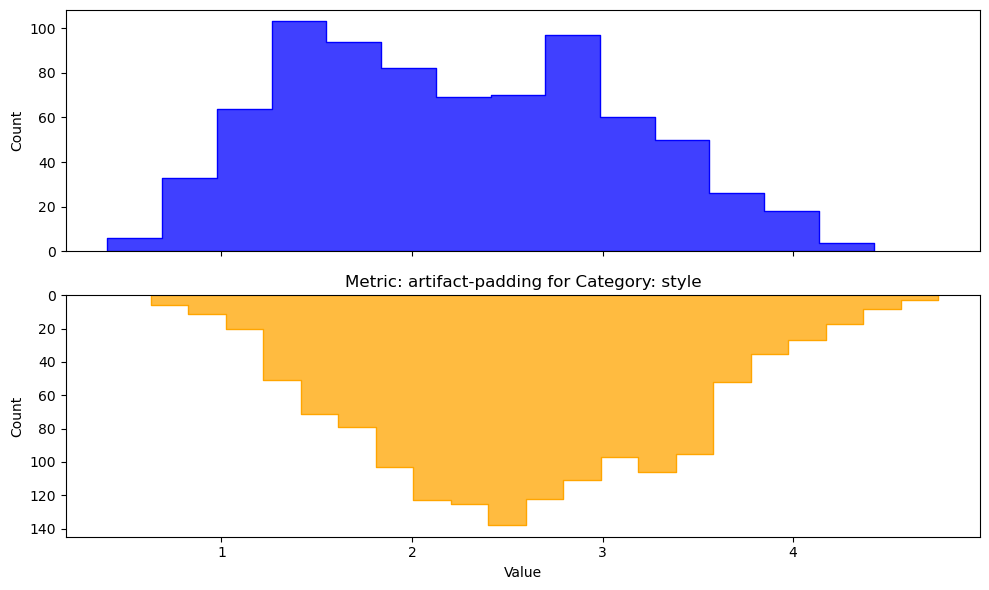

In [151]:
metrics = df_gen.columns[1:4]
categories = df_gen['category'].unique()

for metric in metrics:
    for category in categories:
        plot_mirrored_histogram_category(df, df_gen, metric, category)
        plt.savefig(f'figures/{metric}-{category}.png')

### Generated images lokr

In [218]:
df_gen_lokr = npz_to_dataframe(
    '/media/sashi/DATA1/datasets_downloaded/lycoris_exp_paper/generated_scores/v15-exp-1053-sd15-lokrf8dinf-lr1e-3-a/',
    None
)

df_gen_lokr['class'] = df_gen_lokr['folder_path'].apply(lambda x: '-'.join(x.split(os.path.sep)[:-1]))

In [219]:
df_gen_lokr

,folder_path,liqe-resize,maniqa-resize,artifact-padding,category,class
0,anime/abukuma/none/in_dist_prompts-image-score...,2.808837,0.469685,1.791016,anime,anime-abukuma-none
1,anime/abukuma/none/in_dist_prompts-image-score...,2.921020,0.604197,1.708984,anime,anime-abukuma-none
2,anime/abukuma/none/in_dist_prompts-image-score...,3.126271,0.527321,1.582031,anime,anime-abukuma-none
3,anime/abukuma/none/in_dist_prompts-image-score...,3.076941,0.461593,1.480469,anime,anime-abukuma-none
4,anime/abukuma/none/in_dist_prompts-image-score...,3.075400,0.534522,1.800781,anime,anime-abukuma-none
...,...,...,...,...,...,...
3895,style/vladimir_borovikovsky/in_dist_prompts-im...,2.756264,0.650183,2.126953,style,style-vladimir_borovikovsky
3896,style/vladimir_borovikovsky/in_dist_prompts-im...,2.553832,0.562430,2.378906,style,style-vladimir_borovikovsky
3897,style/vladimir_borovikovsky/in_dist_prompts-im...,2.868424,0.387125,2.474609,style,style-vladimir_borovikovsky
3898,style/vladimir_borovikovsky/in_dist_prompts-im...,2.918030,0.599651,2.060547,style,style-vladimir_borovikovsky


In [220]:
df_gen_lokr.columns[1:5]

Index(['liqe-resize', 'maniqa-resize', 'artifact-padding', 'category'], dtype='object')

In [221]:
df_gen_lokr

,folder_path,liqe-resize,maniqa-resize,artifact-padding,category,class
0,anime/abukuma/none/in_dist_prompts-image-score...,2.808837,0.469685,1.791016,anime,anime-abukuma-none
1,anime/abukuma/none/in_dist_prompts-image-score...,2.921020,0.604197,1.708984,anime,anime-abukuma-none
2,anime/abukuma/none/in_dist_prompts-image-score...,3.126271,0.527321,1.582031,anime,anime-abukuma-none
3,anime/abukuma/none/in_dist_prompts-image-score...,3.076941,0.461593,1.480469,anime,anime-abukuma-none
4,anime/abukuma/none/in_dist_prompts-image-score...,3.075400,0.534522,1.800781,anime,anime-abukuma-none
...,...,...,...,...,...,...
3895,style/vladimir_borovikovsky/in_dist_prompts-im...,2.756264,0.650183,2.126953,style,style-vladimir_borovikovsky
3896,style/vladimir_borovikovsky/in_dist_prompts-im...,2.553832,0.562430,2.378906,style,style-vladimir_borovikovsky
3897,style/vladimir_borovikovsky/in_dist_prompts-im...,2.868424,0.387125,2.474609,style,style-vladimir_borovikovsky
3898,style/vladimir_borovikovsky/in_dist_prompts-im...,2.918030,0.599651,2.060547,style,style-vladimir_borovikovsky


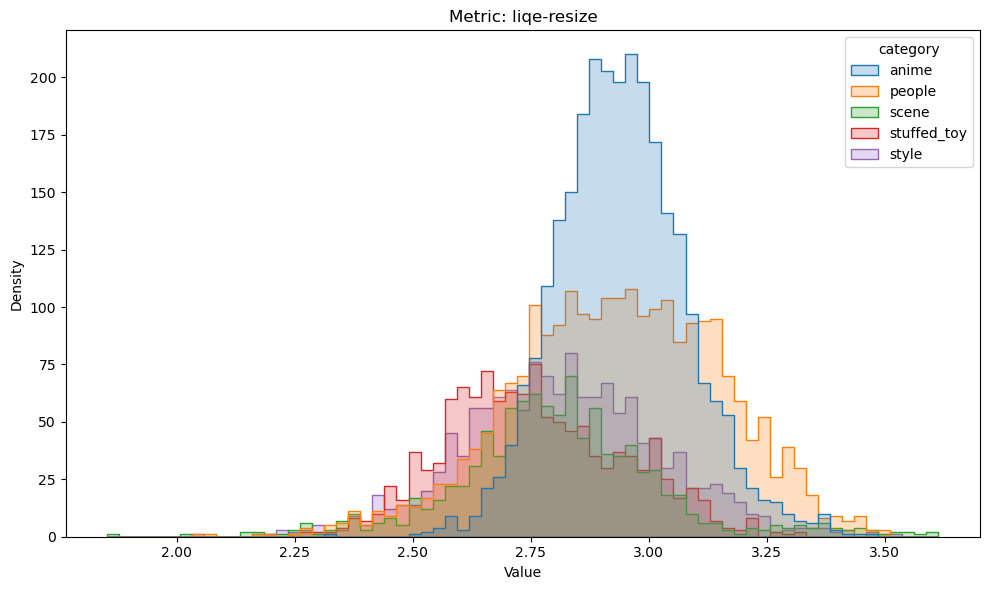

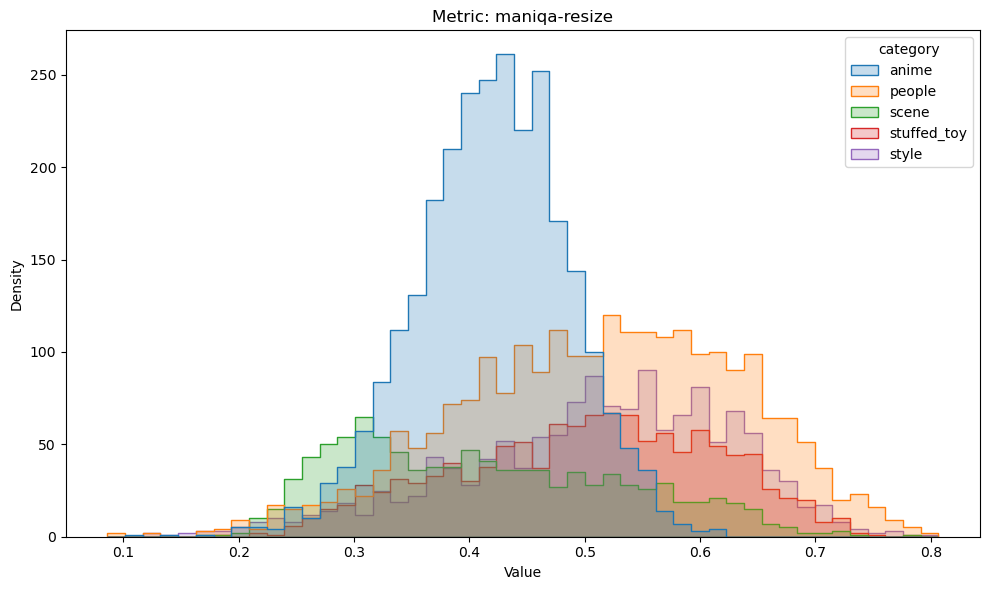

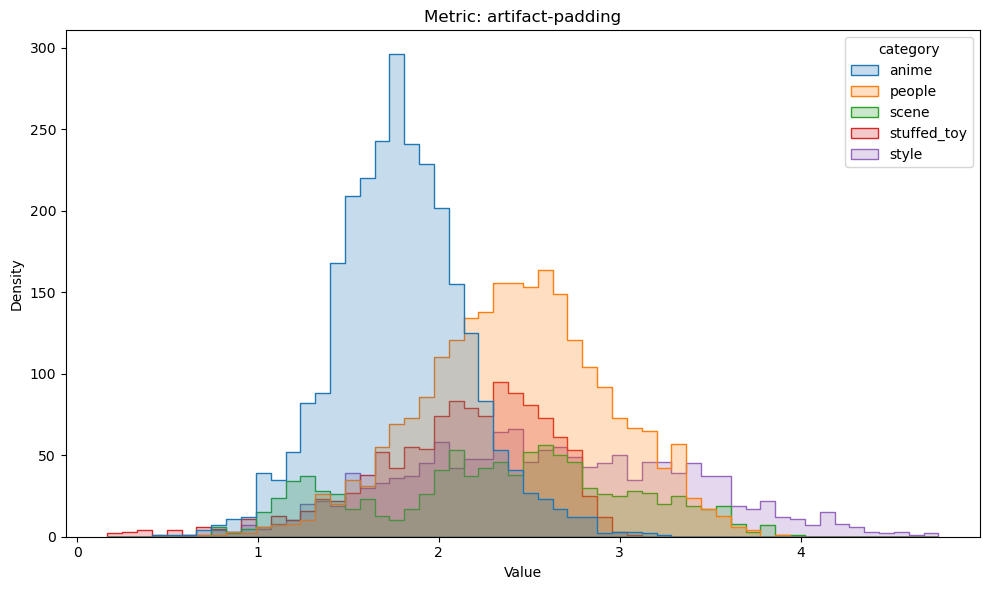

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

df_gen_lokr['dummy_index'] = range(len(df_gen))
metrics = df_gen_lokr.columns[1:4]

for metric in metrics:

    metric_df = df_gen_lokr.pivot(index='dummy_index',
                                  columns='category',
                                  values=metric)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=metric_df, element="step", common_norm=False)
    plt.title(f'Metric: {metric}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f'figures/generated-{metric}.png')

<AxesSubplot: >

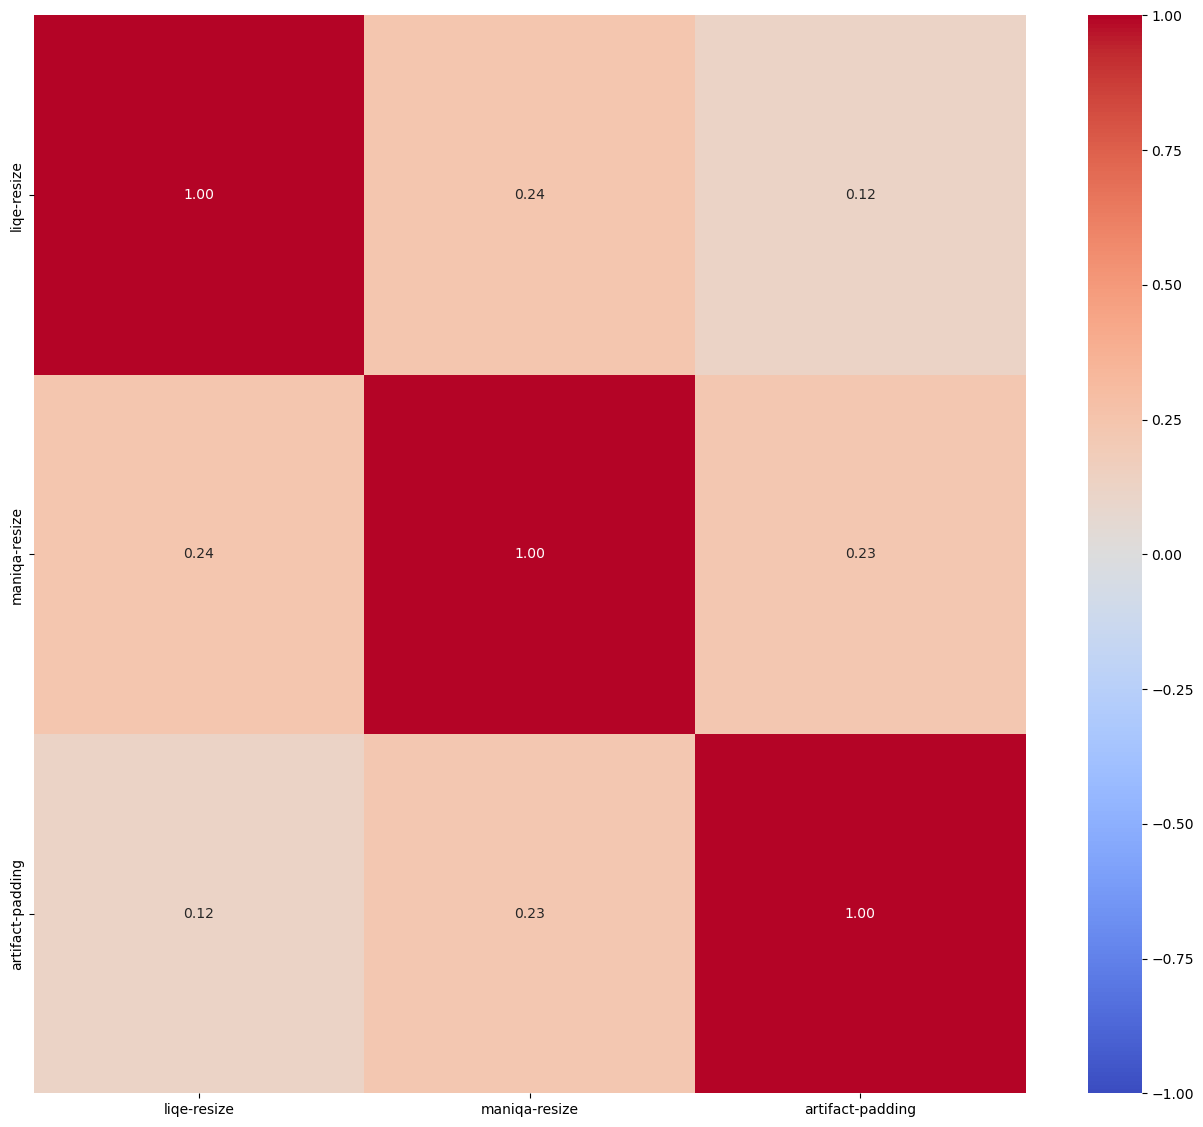

In [222]:
ordered_cols = [
    'liqe-resize',
    'maniqa-resize',
    'artifact-padding'
]
correlation_matrix = df_gen_lokr[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")

In [223]:
df_gen_lokr_sel

,folder_path,liqe-resize,maniqa-resize,artifact-padding,category,source
2700,people/Admiral_Piett/figurine/in_dist_prompts-...,2.908757,0.649110,2.664062,people,df2
2701,people/Admiral_Piett/figurine/in_dist_prompts-...,2.738743,0.558324,2.832031,people,df2
2702,people/Admiral_Piett/figurine/in_dist_prompts-...,2.932643,0.672003,2.902344,people,df2
2703,people/Admiral_Piett/figurine/in_dist_prompts-...,3.252570,0.661600,2.984375,people,df2
2704,people/Admiral_Piett/figurine/in_dist_prompts-...,2.758125,0.704449,2.892578,people,df2
...,...,...,...,...,...,...
7295,stuffed_toy/plushie_tortoise/out_dist_prompts-...,2.714863,0.687705,2.744141,stuffed_toy,df2
7296,stuffed_toy/plushie_tortoise/out_dist_prompts-...,2.852022,0.652066,2.431641,stuffed_toy,df2
7297,stuffed_toy/plushie_tortoise/out_dist_prompts-...,2.717483,0.660290,2.142578,stuffed_toy,df2
7298,stuffed_toy/plushie_tortoise/out_dist_prompts-...,2.698018,0.677429,2.167969,stuffed_toy,df2


<AxesSubplot: >

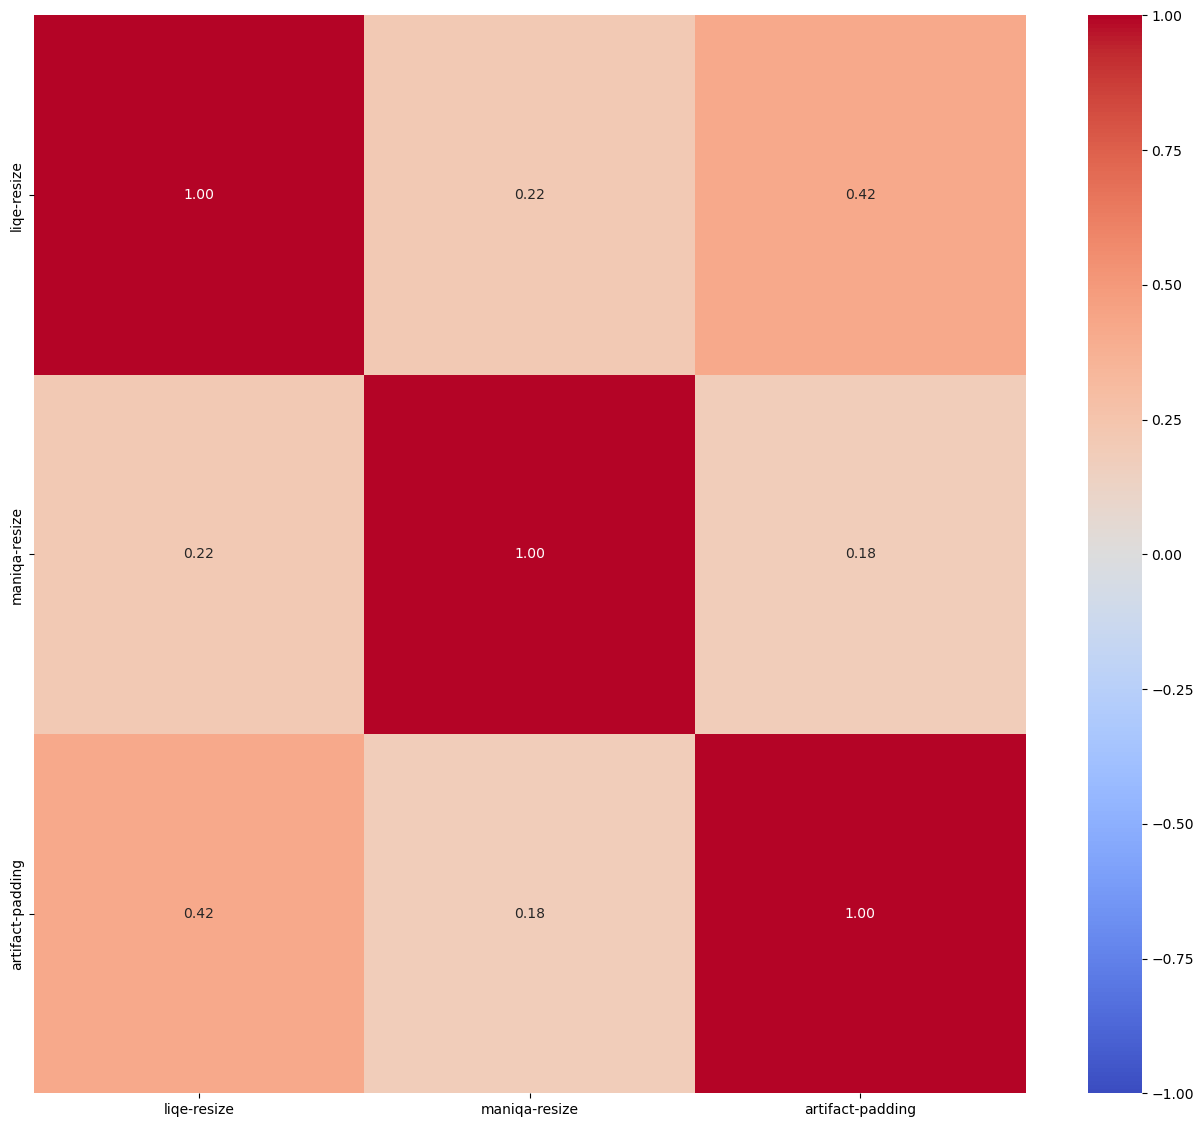

In [224]:
ordered_cols = ['liqe-resize', 'maniqa-resize', 'artifact-padding']
df_gen_lokr_sel = df_gen_lokr[df_gen_lokr['category'].apply(
    lambda x: x not in ['anime', 'style'])]
correlation_matrix = df_gen_lokr_sel[ordered_cols].corr()

# Plot the heatmap with annotations
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            fmt=".2f")

In [147]:
def plot_mirrored_histogram(df1, df2, metric):
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))

    # Stack the dataframes with an indicator column
    df1['source'] = 'df1'
    df2['source'] = 'df2'
    combined = pd.concat([df1, df2])

    sns.histplot(data=combined[combined['source'] == 'df1'],
                 x=metric,
                 hue='category',
                 element="step",
                 ax=axes[0])
    sns.histplot(data=combined[combined['source'] == 'df2'],
                 x=metric,
                 hue='category',
                 element="step",
                 ax=axes[1])

    axes[1].invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title(f'Metric: {metric}, real on top, fake at bottom')
    plt.xlabel('Value')
    plt.tight_layout()

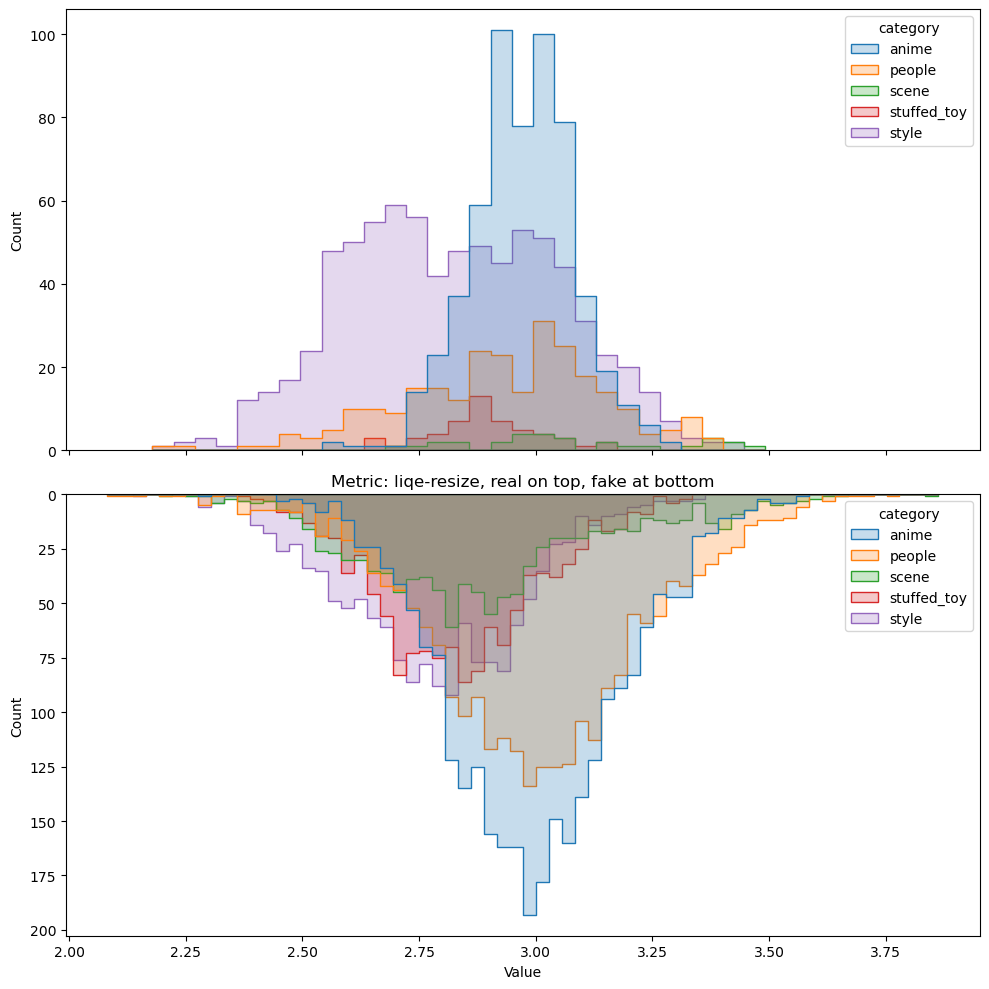

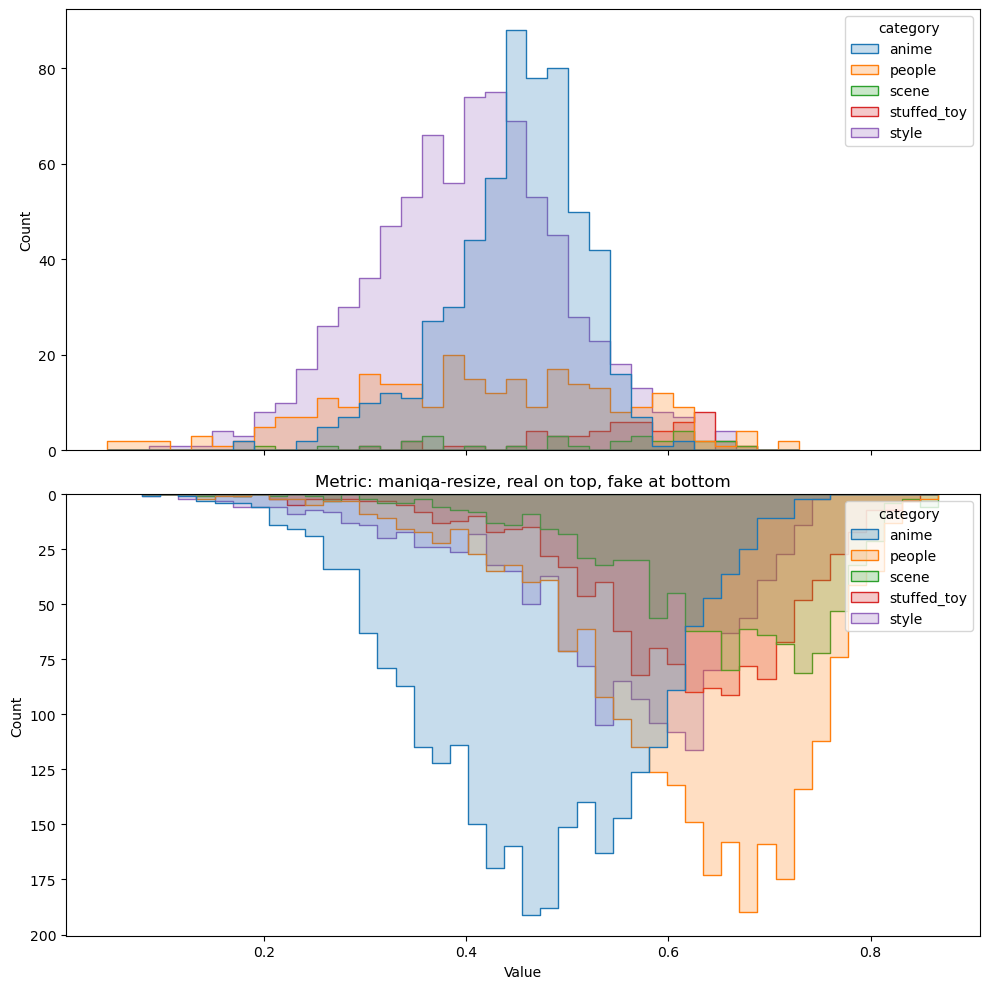

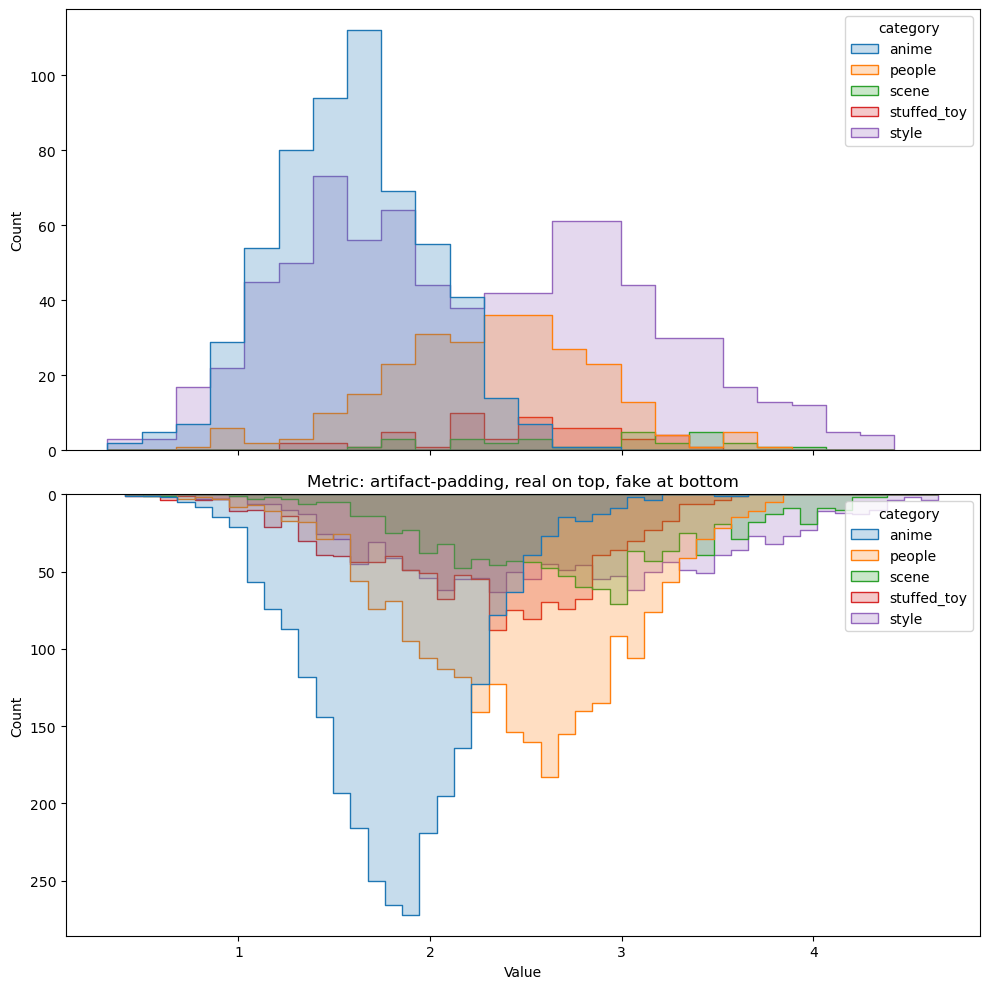

In [156]:
metrics = df_gen_lokr.columns[1:4]

for metric in metrics:
    plot_mirrored_histogram(df, df_gen_lokr, metric)
    plt.savefig(f'figures/lokr/{metric}.png')

In [157]:
df_gen.columns[1:4]

Index(['liqe-resize', 'maniqa-resize', 'artifact-padding'], dtype='object')

In [225]:
def plot_mirrored_histogram_category(df1, df2, metric, cat, cat_name):
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 6))

    sns.histplot(data=df1[df1[cat] == cat_name],
                 x=metric,
                 element="step",
                 ax=axes[0],
                 color='blue',
                 label='df1')
    sns.histplot(data=df2[df2[cat] == cat_name],
                 x=metric,
                 element="step",
                 ax=axes[1],
                 color='orange',
                 label='df2')

    axes[1].invert_yaxis()

    plt.subplots_adjust(hspace=0)
    plt.title(f'Metric: {metric} for Category: {cat_name}')
    plt.xlabel('Value')
    plt.tight_layout()

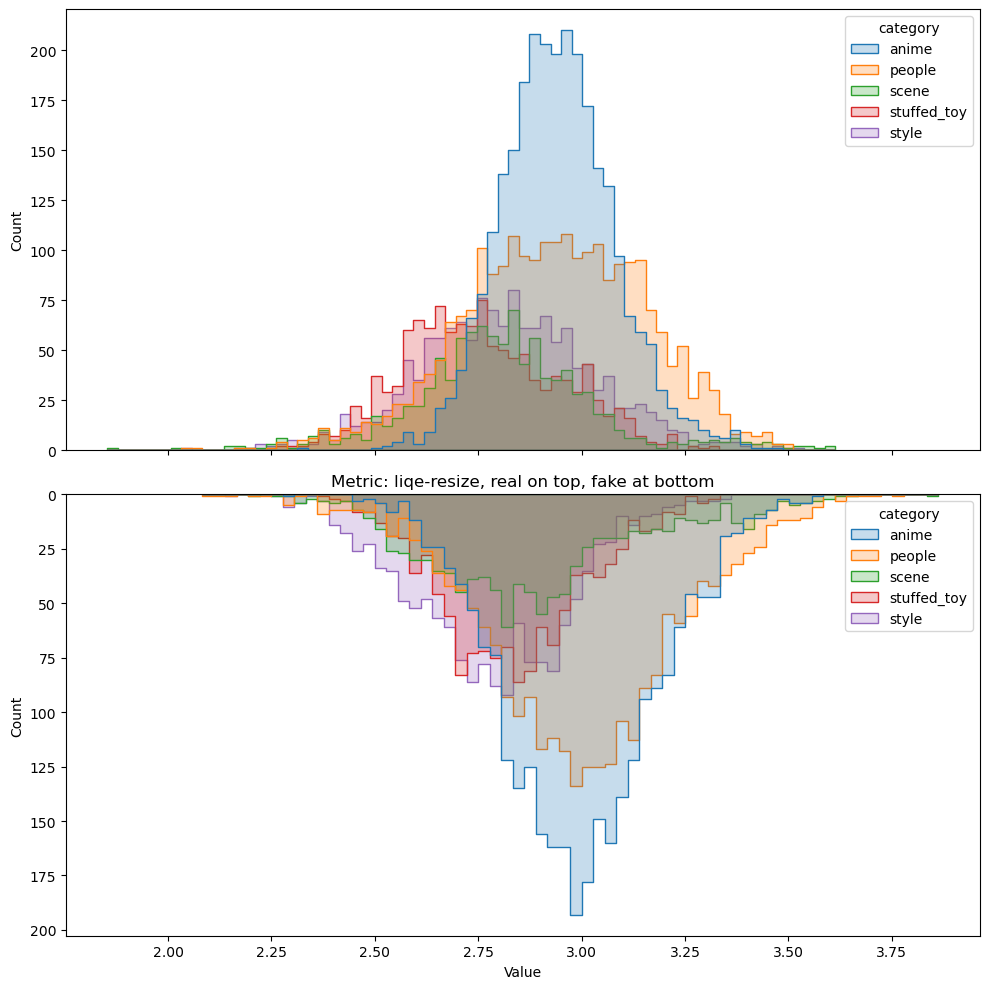

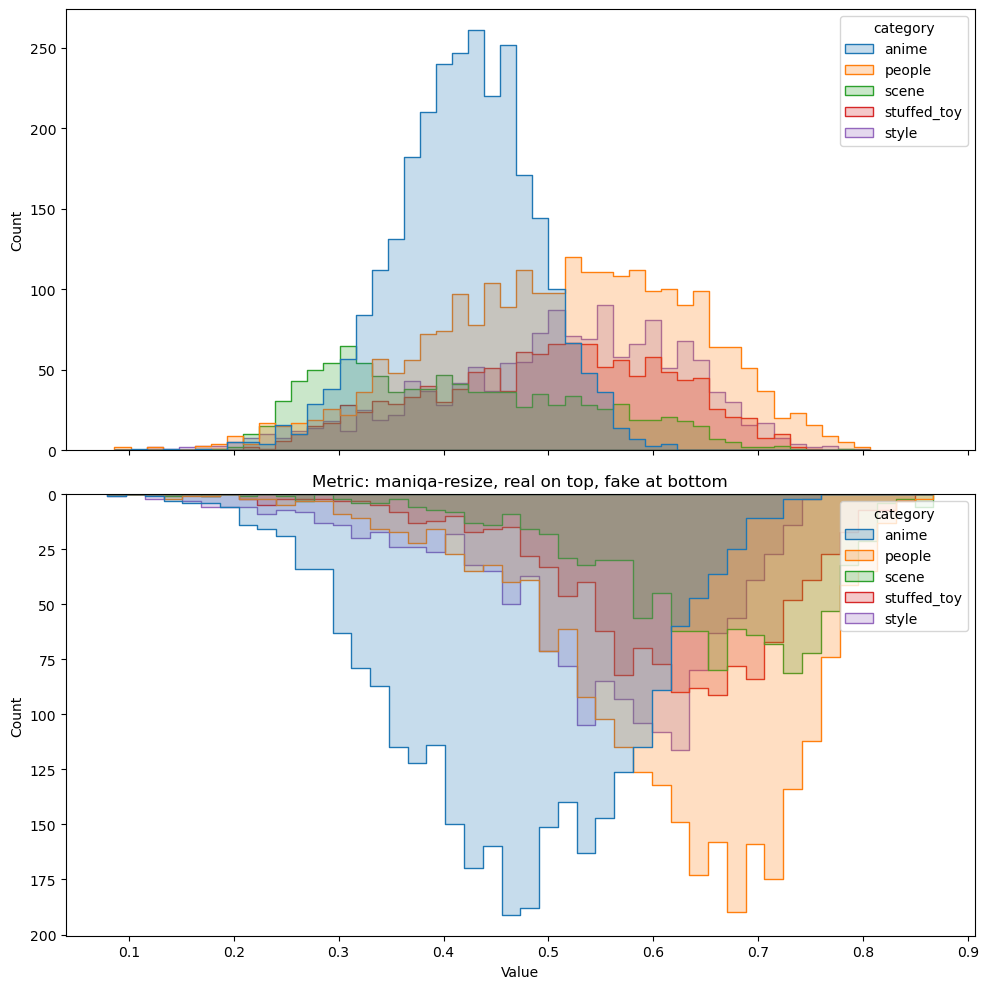

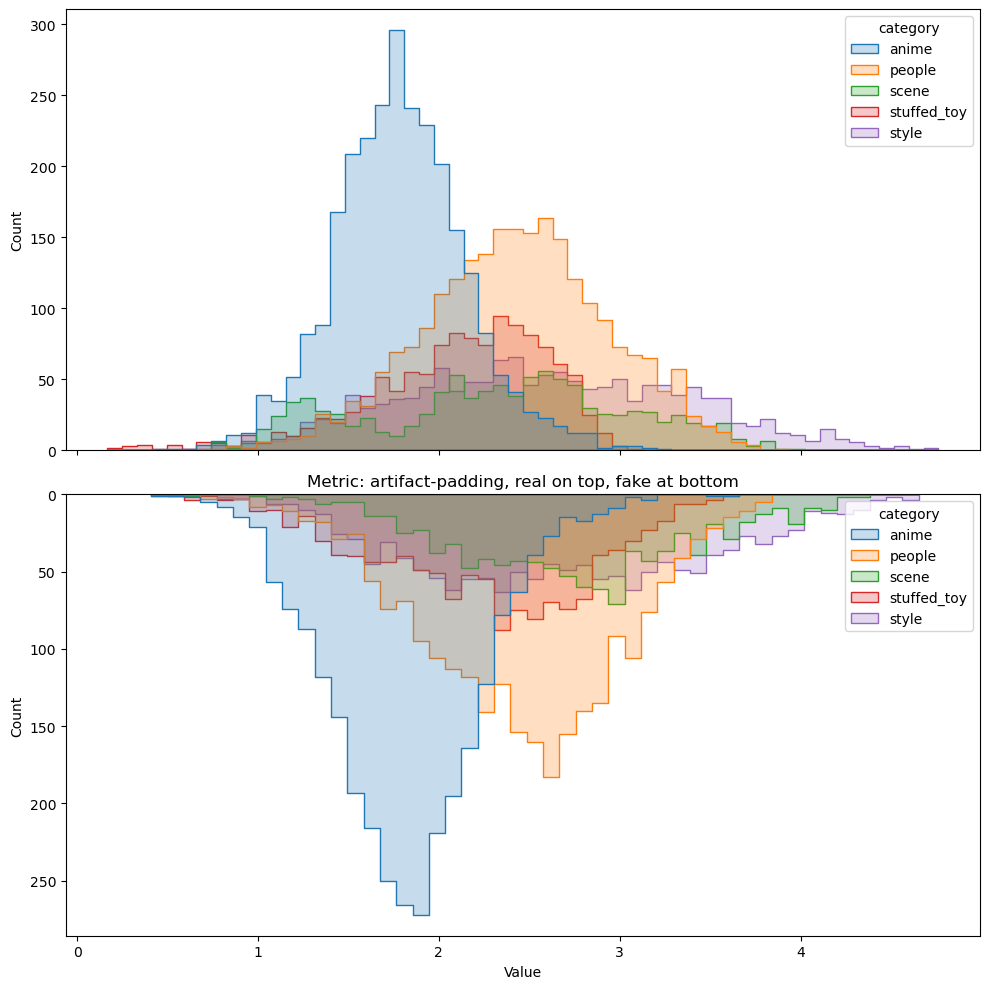

In [169]:
metrics = df_gen_lokr.columns[1:4]

for metric in metrics:
    plot_mirrored_histogram(df_gen, df_gen_lokr, metric)
    plt.savefig(f'figures/db_lokr/{metric}.png')

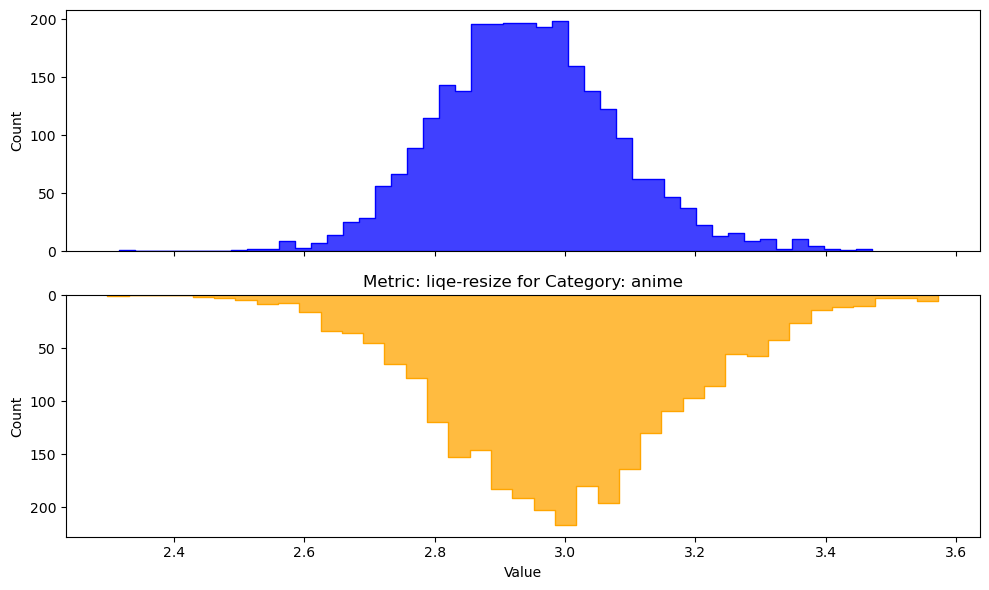

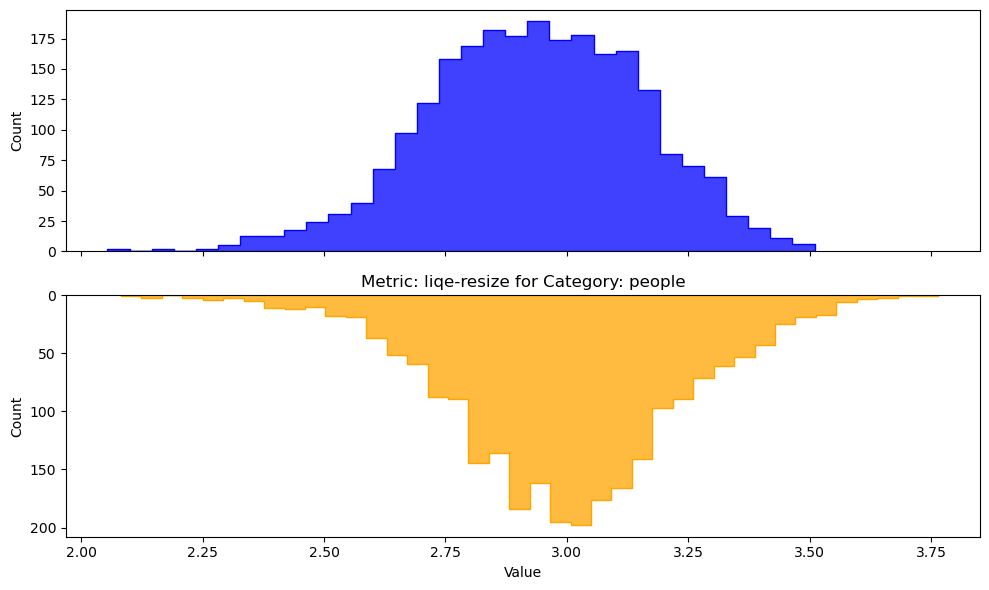

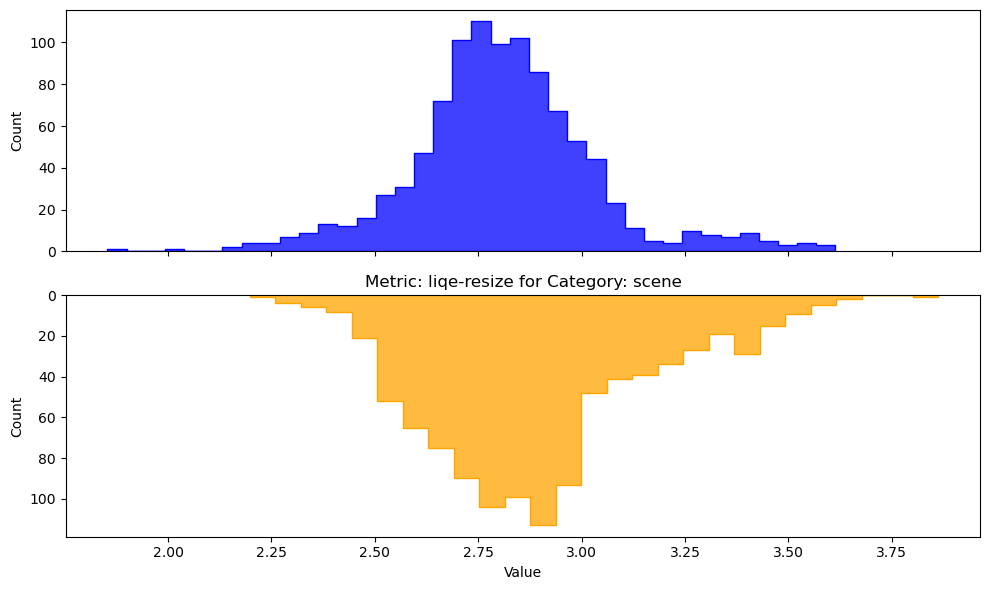

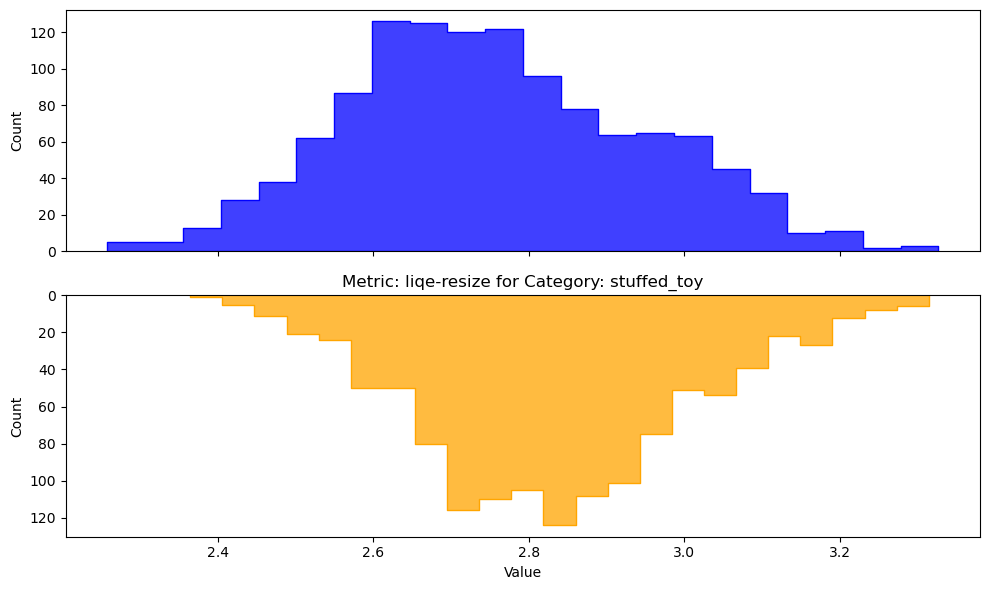

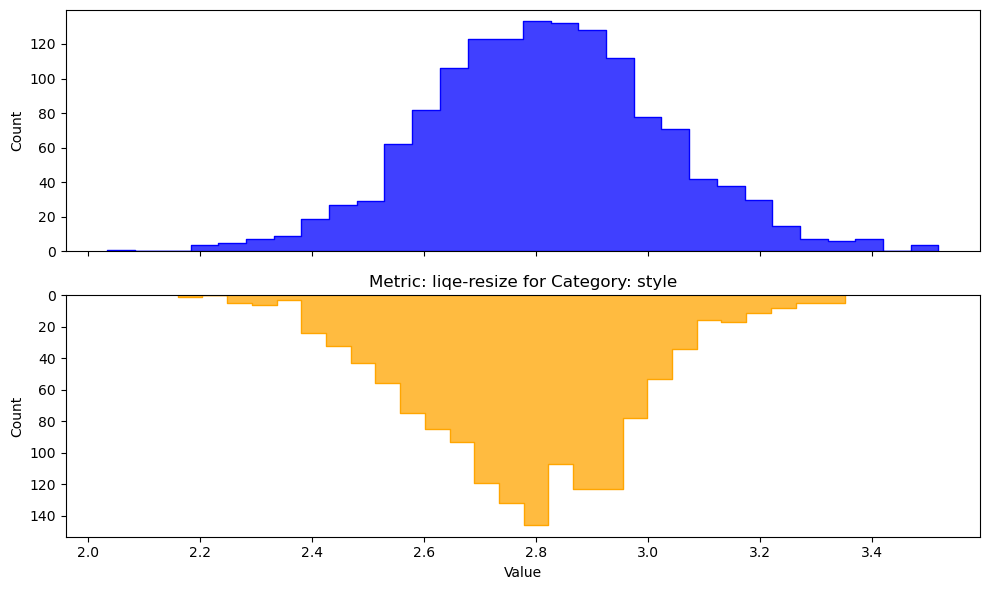

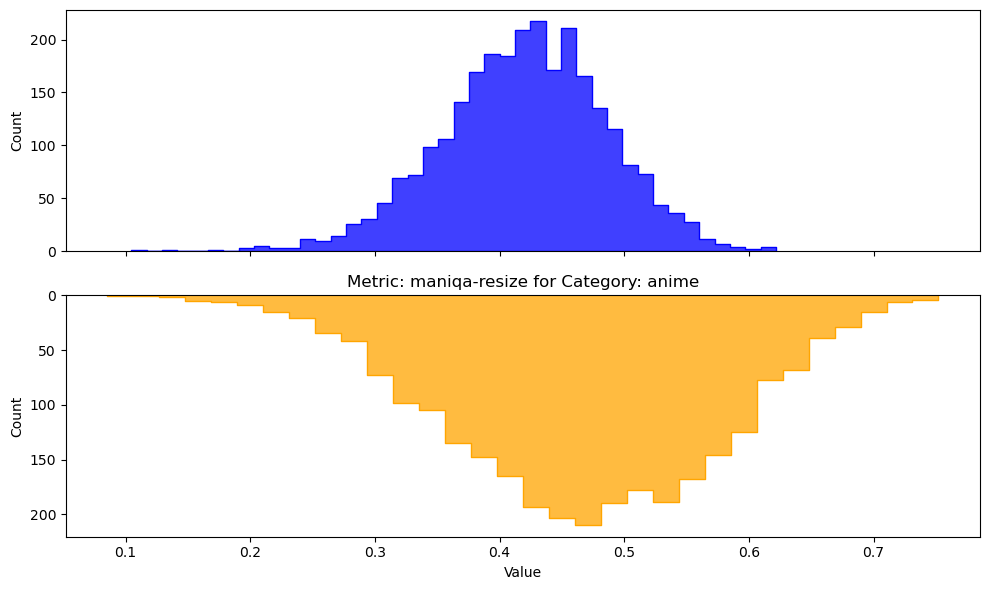

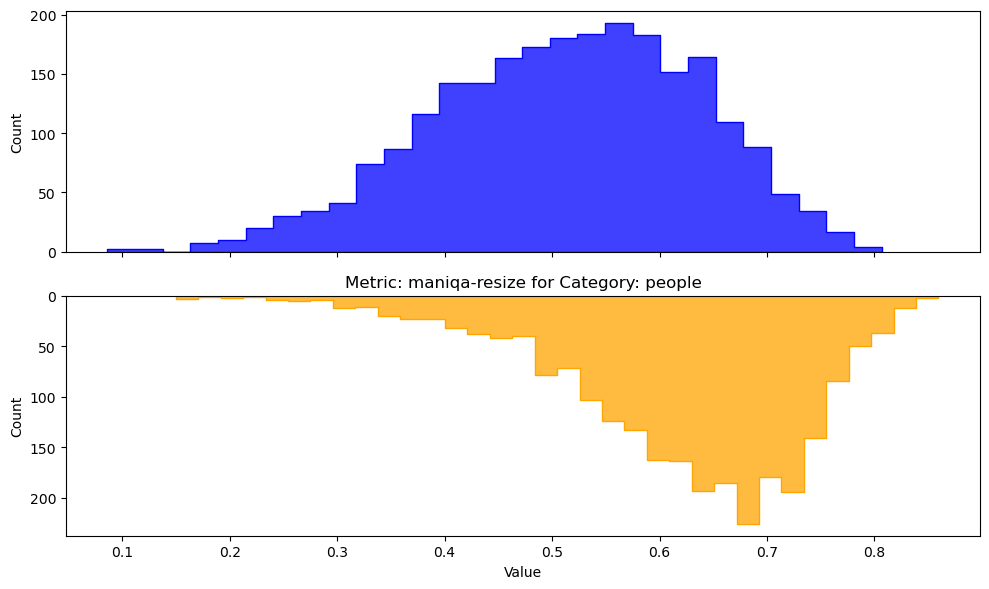

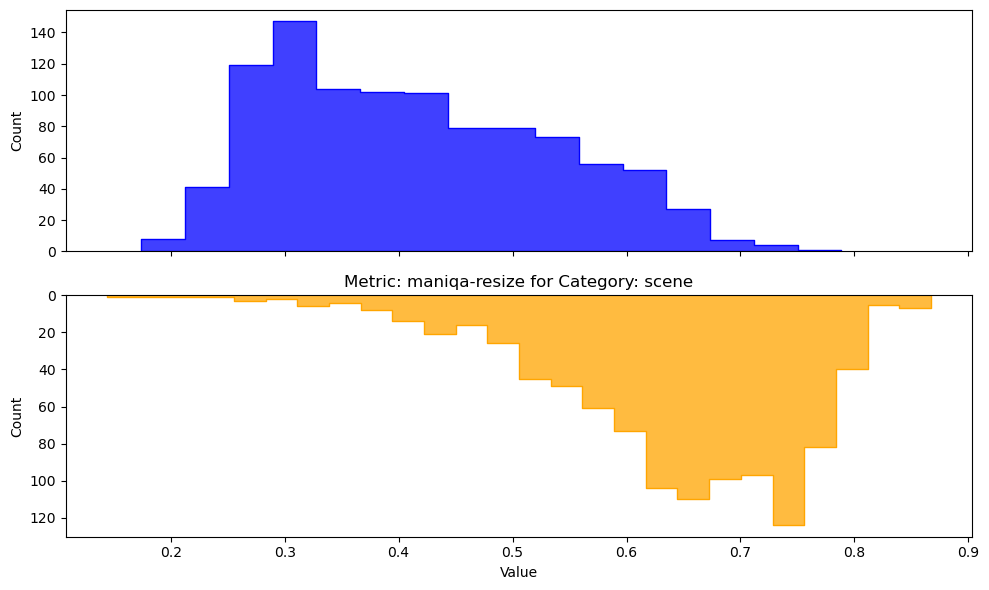

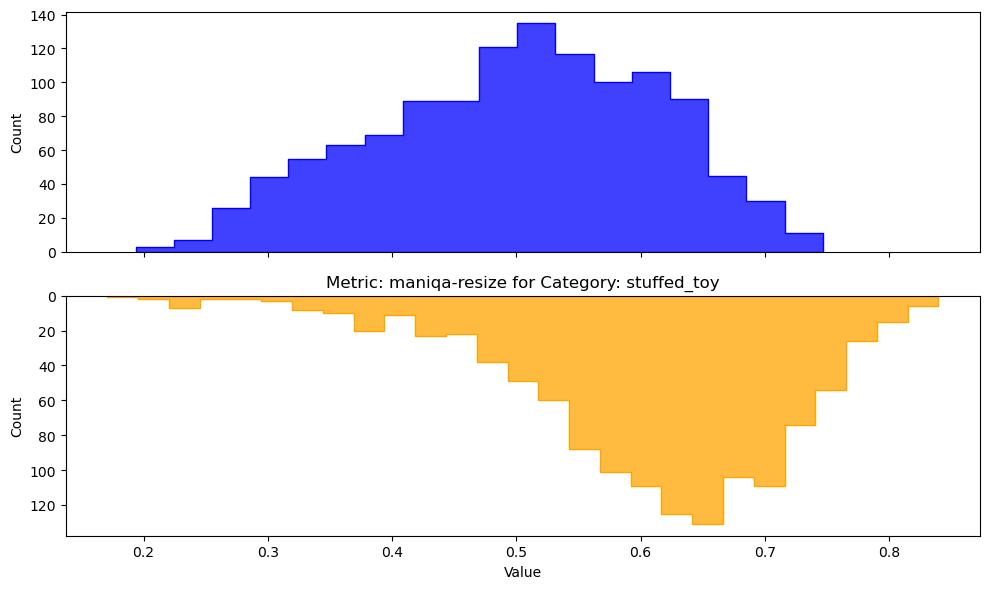

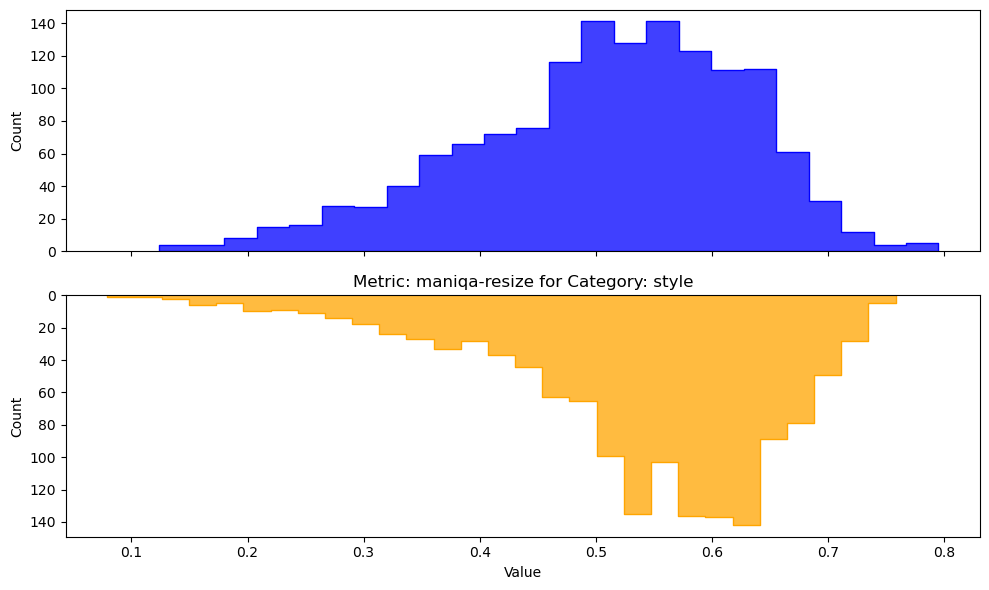

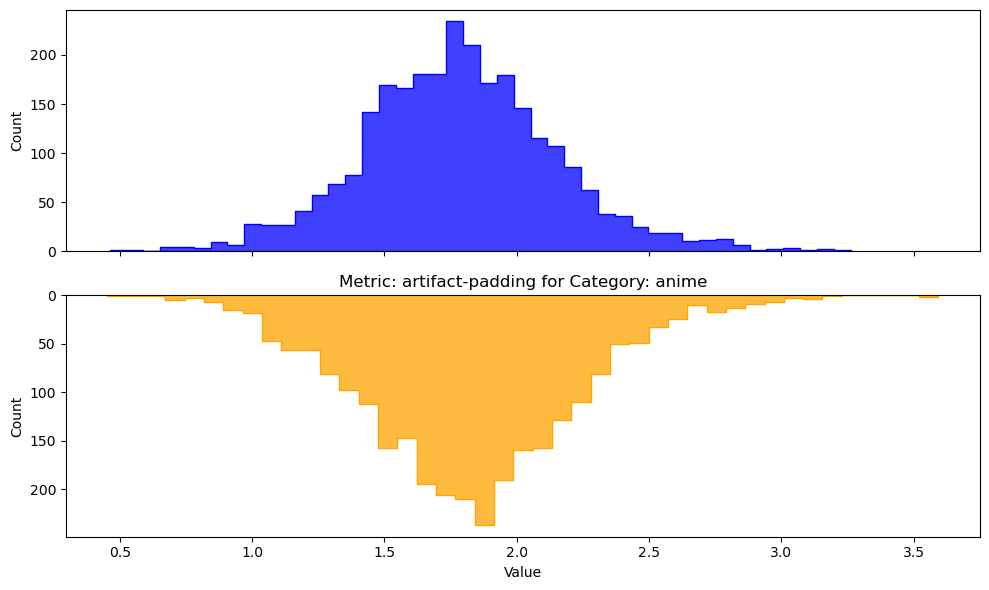

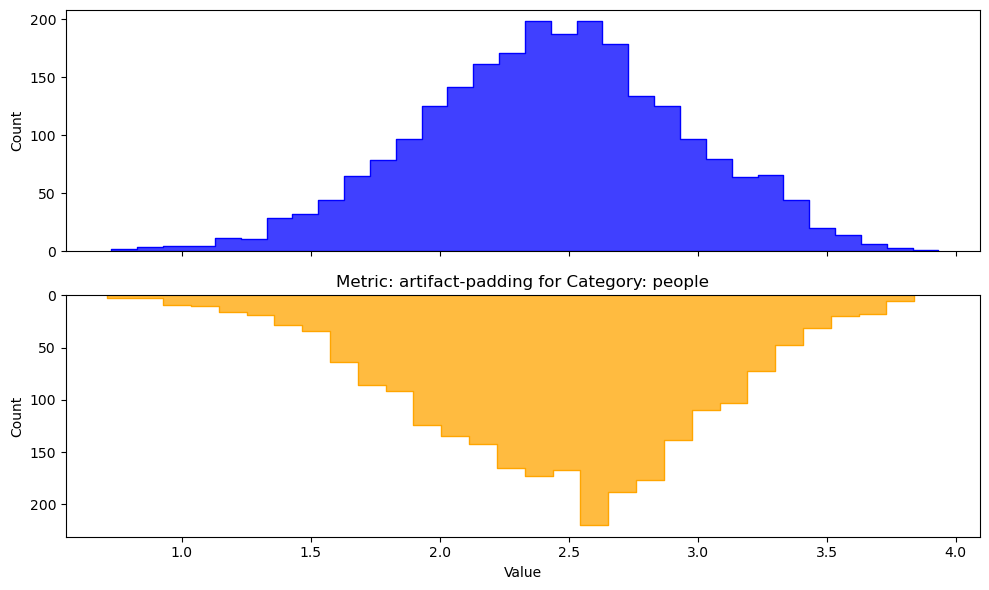

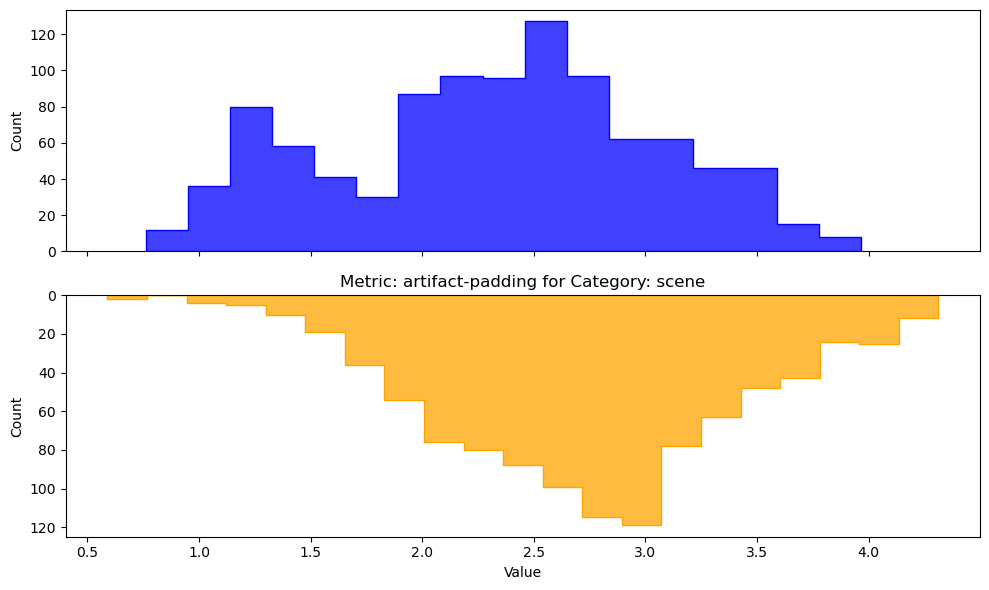

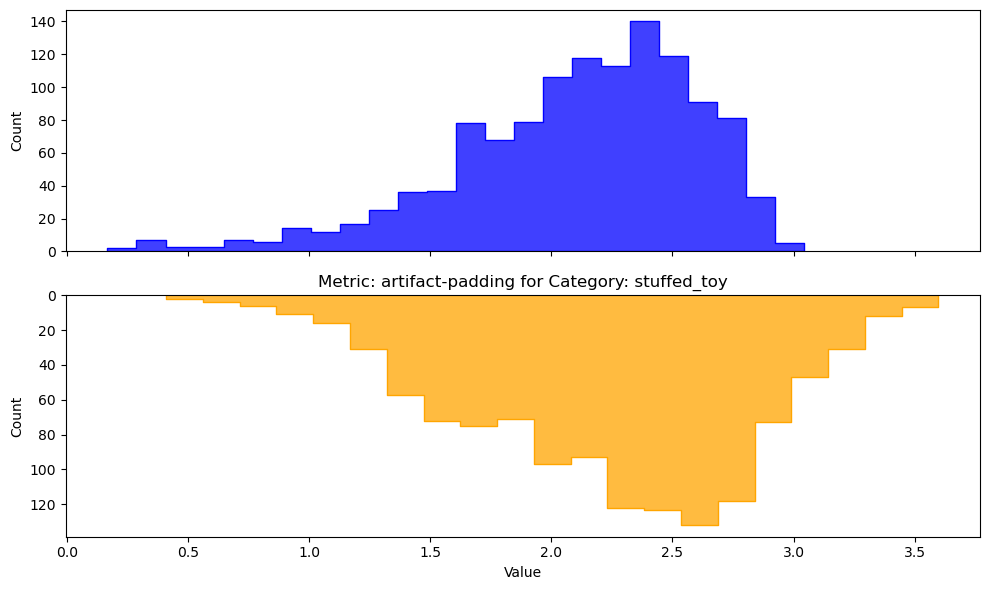

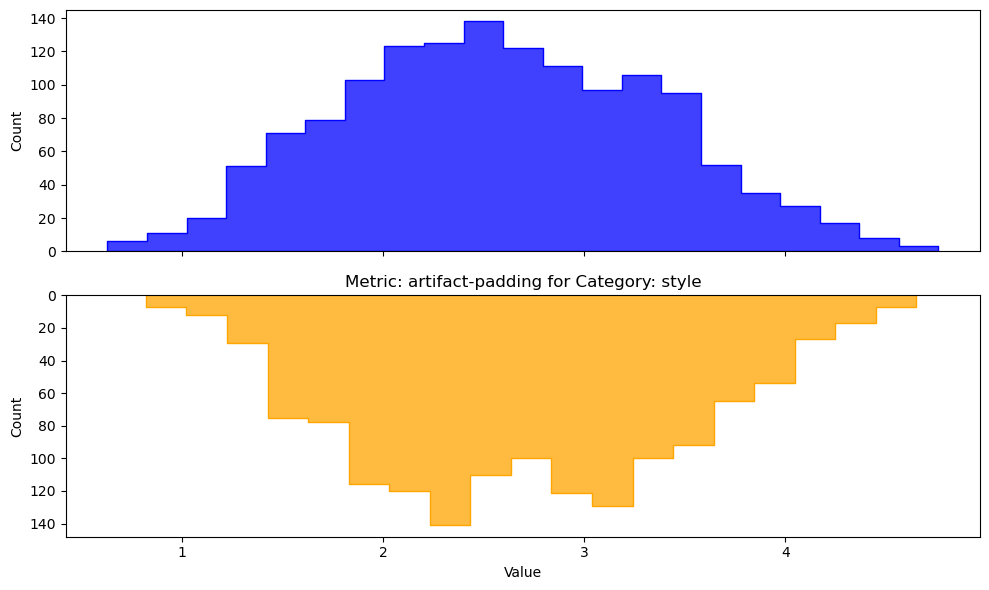

In [170]:
metrics = df_gen_lokr.columns[1:4]
categories = df_gen_lokr['category'].unique()

for metric in metrics:
    for category in categories:
        plot_mirrored_histogram_category(df_gen, df_gen_lokr, metric, category)
        plt.savefig(f'figures/db_lokr/{metric}-{category}.png')

In [226]:
metrics = df_gen_lokr.columns[1:4]
categories = df_gen_lokr['class'].unique()

for metric in metrics:
    for cls in categories:
        plot_mirrored_histogram_category(df, df_gen_lokr, metric, 'class', cls)
        plt.savefig(f'figures/lokr_classes/{metric}-f-{cls}.png')
        plt.close()

In [227]:
metrics = df_gen_lokr.columns[1:4]
categories = df_gen_lokr['class'].unique()

for metric in metrics:
    for cls in categories:
        plot_mirrored_histogram_category(df_gen, df_gen_lokr, metric, 'class', cls)
        plt.savefig(f'figures/db_lokr_classes/{metric}-f-{cls}.png')
        plt.close()

In [228]:
metrics = df_gen_lokr.columns[1:4]
categories = df_gen_lokr['class'].unique()

for metric in metrics:
    for cls in categories:
        plot_mirrored_histogram_category(df, df_gen, metric, 'class', cls)
        plt.savefig(f'figures/db_classes/{metric}-f-{cls}.png')
        plt.close()

In [231]:
df_styles = df[df['category']=='style']

/tmp/ipykernel_29438/3529520962.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_styles['dummy_index'] = range(len(df_styles))


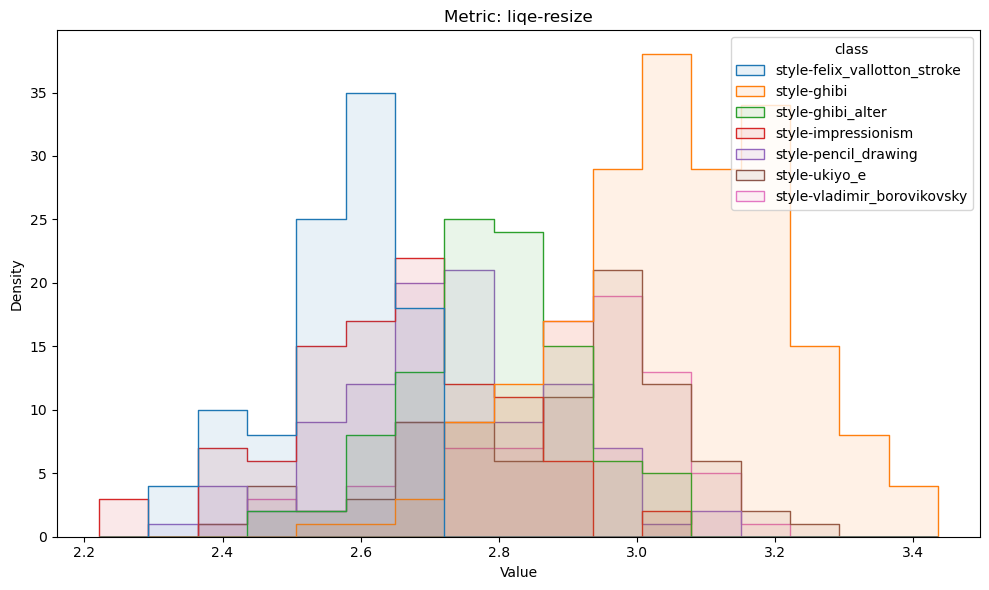

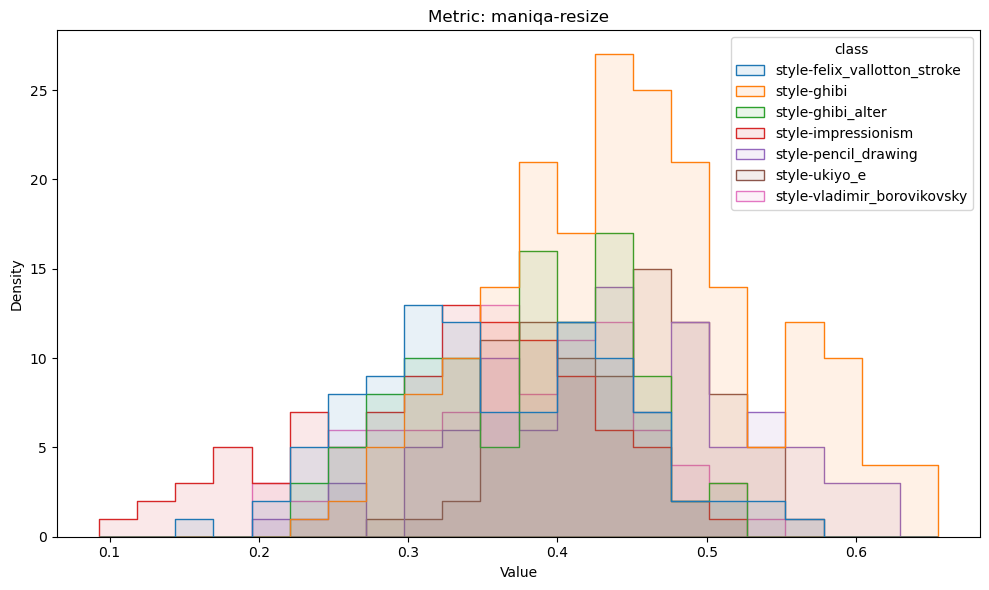

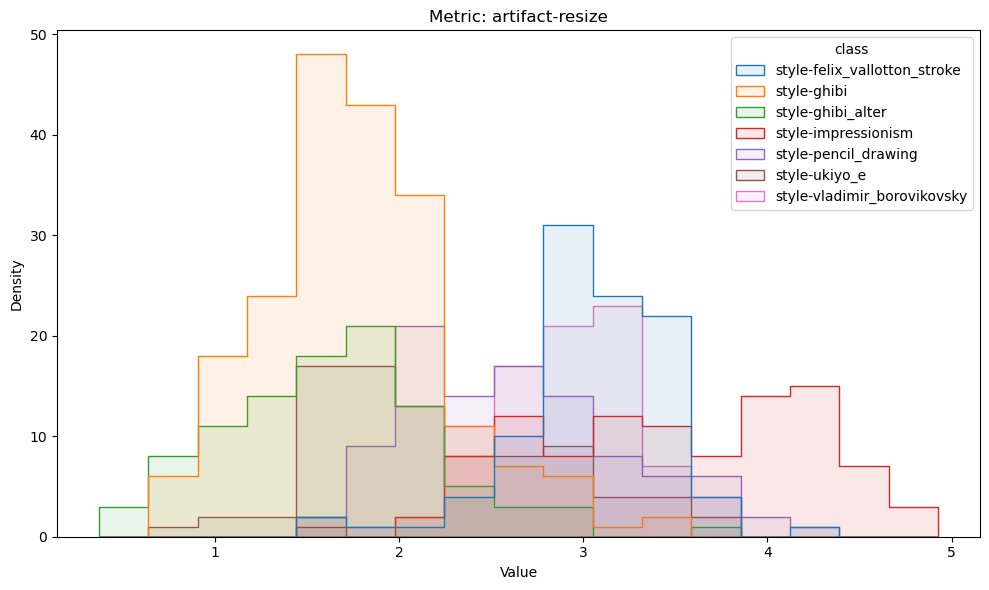

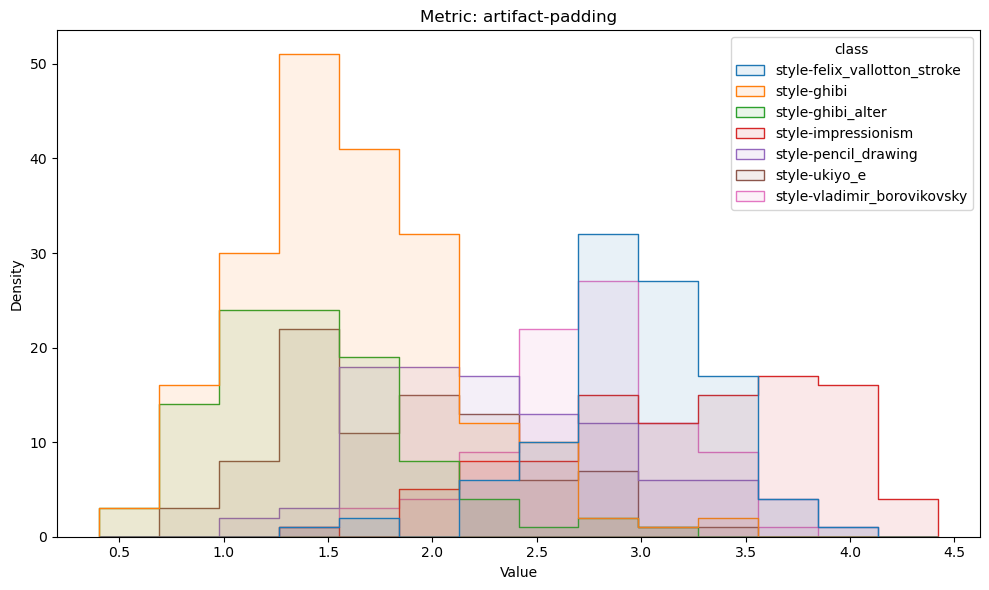

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

df_styles['dummy_index'] = range(len(df_styles))
metrics = df.columns[2:6]

for metric in metrics:

    metric_df = df_styles.pivot(index='dummy_index',
                                columns='class',
                                values=metric)
    plt.figure(figsize=(10, 6))
    sns.histplot(data=metric_df, element="step", common_norm=False, alpha=0.1)
    plt.title(f'Metric: {metric}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.tight_layout()
    plt.savefig(f'figures/real-styles-{metric}.png')